In [1]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl

In [12]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Blinks\Subject_Block_Session_Trial_Blinks.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Pupils\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


# pupil size on sections of writing
blinkFrequency1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.BlinkFrequency_writingSections]
blinkFrequency2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.BlinkFrequency_writingSections]
blinkFrequency3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.BlinkFrequency_writingSections]
blinkFrequency4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.BlinkFrequency_writingSections]

df['blinkFrequency1'] = blinkFrequency1
df['blinkFrequency2'] = blinkFrequency2
df['blinkFrequency3'] = blinkFrequency3
df['blinkFrequency4'] = blinkFrequency4



# pupil size on sections of writing
blinkDurationAverage1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.BlinkDurationAverage_writingSections]
blinkDurationAverage2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.BlinkDurationAverage_writingSections]
blinkDurationAverage3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.BlinkDurationAverage_writingSections]
blinkDurationAverage4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.BlinkDurationAverage_writingSections]

df['blinkDurationAverage1'] = blinkDurationAverage1
df['blinkDurationAverage2'] = blinkDurationAverage2
df['blinkDurationAverage3'] = blinkDurationAverage3
df['blinkDurationAverage4'] = blinkDurationAverage4


# pupil size on sections of writing
InterBlinkDuration1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.InterBlinkDuration_writingSections]
InterBlinkDuration2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.InterBlinkDuration_writingSections]
InterBlinkDuration3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.InterBlinkDuration_writingSections]
InterBlinkDuration4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.InterBlinkDuration_writingSections]

df['InterBlinkDuration1'] = InterBlinkDuration1
df['InterBlinkDuration2'] = InterBlinkDuration2
df['InterBlinkDuration3'] = InterBlinkDuration3
df['InterBlinkDuration4'] = InterBlinkDuration4


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]


In [13]:
DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

In [14]:
df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])

df1.drop(columns=['BlinkFrequency_writingSections', 'BlinkDurationAverage_writingSections', 'InterBlinkDuration_writingSections'], axis=0, inplace=True)

df1.to_csv(r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Blinks\Subject_Block_Session_Trial_Blinks.csv', sep=',',na_rep='', header=True, index=False)


In [15]:
df1.columns

Index(['Subject', 'Day', 'DayDT', 'Language', 'Session', 'SessionDifficulty',
       'Trial', 'ScoreDifficulty', 'BlinkFrequency_reading',
       'BlinkFrequency_writing', 'BlinkDurationAverage_reading',
       'BlinkDurationAverage_writing', 'InterBlinkDuration_reading',
       'InterBlinkDuration_writing', 'BlinkLongFrequency_reading',
       'BlinkLongFrequency_writing', 'BlinkLongToNormalRatio_writing',
       'InterBlinkLongDuration_reading', 'InterBlinkLongDuration_writing',
       'BlinkBurstFrequency_reading', 'BlinkBurstFrequency_writing',
       'BlinkBurstToTotalBlinksRatio_reading',
       'BlinkBurstToTotalBlinksRatio_writing', 'MentalDemand',
       'PhysicalDemand', 'TemporalDemand', 'Performance', 'Effort',
       'Frustration', 'FatigueBefore', 'FatigueAfter', 'FatigueDifference',
       'FatigueDuring', 'blinkFrequency1', 'blinkFrequency2',
       'blinkFrequency3', 'blinkFrequency4', 'blinkDurationAverage1',
       'blinkDurationAverage2', 'blinkDurationAverage3',
  

# Box plots of blink count

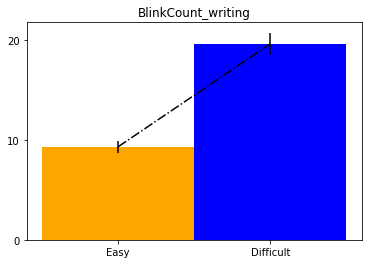

In [5]:
PlotTitle = 'BlinkCount_writing'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkCount_writing']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


In [ ]:
PlotTitle = 'blink Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['blinkCount1', 'blinkCount2', 'blinkCount3', 'blinkCount4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    print(df1[variable][df1.SessionDifficulty=='D'].count())
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# Blink frequency

In [8]:
variable = 'BlinkFrequency_writing'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
day1_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)]))
day1_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==1)])))
day2_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)]))
day2_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==1)])))
day3_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)]))
day3_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==1)])))
day4_s1_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)]))
day4_s1_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==1)])))

day1_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)]))
day1_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1), df1.Session==2)])))
day2_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)]))
day2_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2), df1.Session==2)])))
day3_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)]))
day3_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3), df1.Session==2)])))
day4_s2_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)]))
day4_s2_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4), df1.Session==2)])))



session_m = [day1_s2_m - day1_s1_m, day2_s2_m - day2_s1_m, day3_s2_m - day3_s1_m, day4_s2_m - day4_s1_m]
session_s = [np.sqrt(day1_s2_m**2+day1_s1_m**2), np.sqrt(day2_s2_m**2 + day2_s1_m**2), np.sqrt(day3_s2_m**2+day3_s1_m**2), \
        np.sqrt(day4_s2_m**2 + day4_s1_m**2)]
print(session_m)
print(np.mean(session_m))
print(session_s)
print(np.mean(session_s))


# Session
print('Language')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')]))
sessionD_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='DA')])))
sessionE_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Language=='EN')])))
print(np.sqrt(sessionD_s**2+sessionE_s**2))


sDiff
E 5.66824732915388
0.28604586823625194
D 6.777878480786186
0.32856118301236487
Day
[1.6149224208470292, -0.8315623728429395, -0.32779251682093413]
0.15185584372771851
[0.6225764333211158, 0.635959846508816, 0.609852917748767]
0.6227963991928996
Session
[2.121420247475739, -1.046214368191829, -1.2900116145642277, 0.1442068545926869]
-0.01764972017190769
[7.989876175067462, 10.080603911038494, 8.930451662146618, 8.430706868472546]
8.857909654181281
Language
0.6749236276056623
0.476965419959615


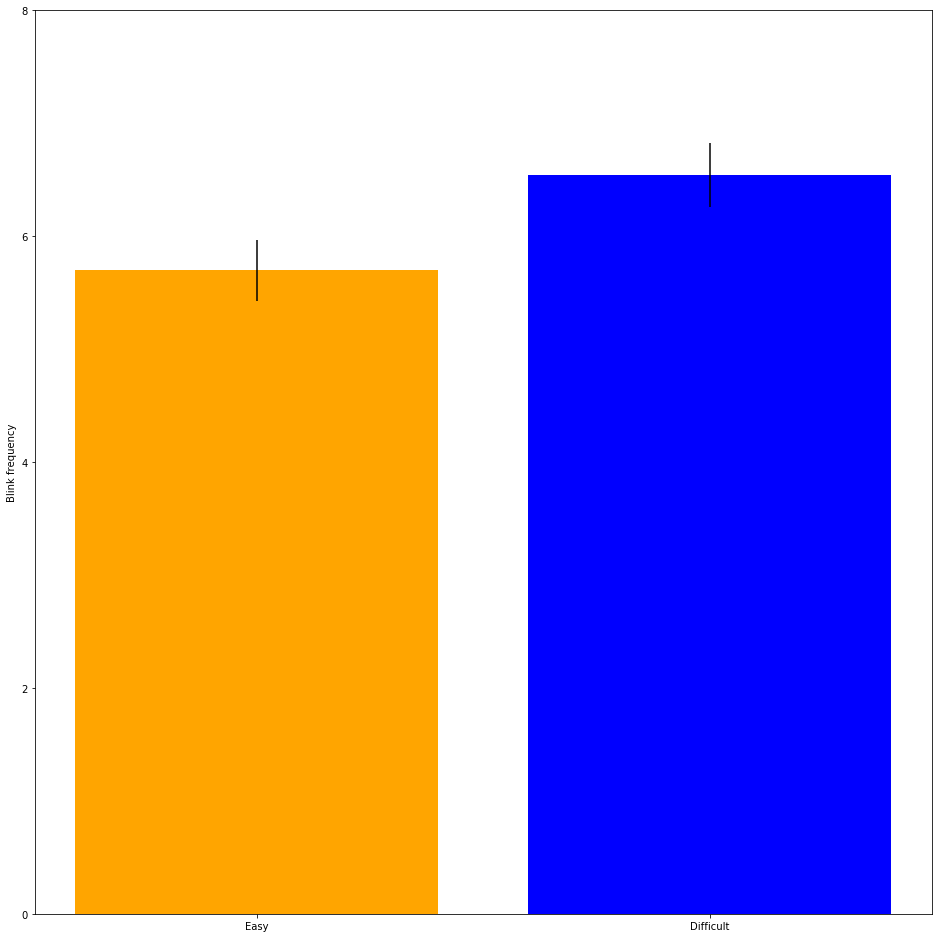

In [9]:
PlotTitle = 'BlinkFrequency_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkFrequency_writing']

label_fontSize = 72
others_fontSize = 62

x_inds = [1,2]

list1 = list()
x_list1 = list()

plt.rcParams.update({'font.size': label_fontSize})

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)

#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Blink frequency')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])

#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
#maxTime = 7
#y_time, h, col = maxTime, 0.1, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\blinkFrequency.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

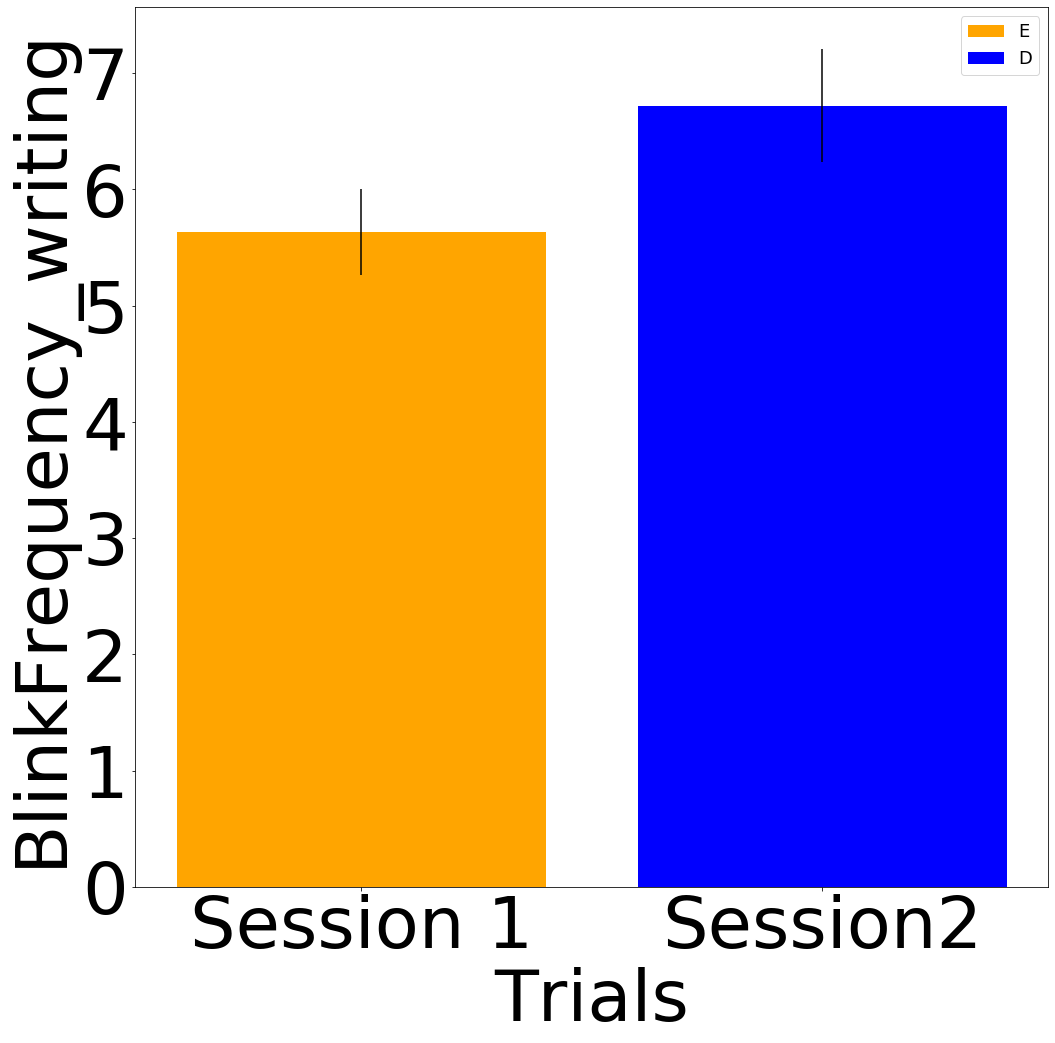

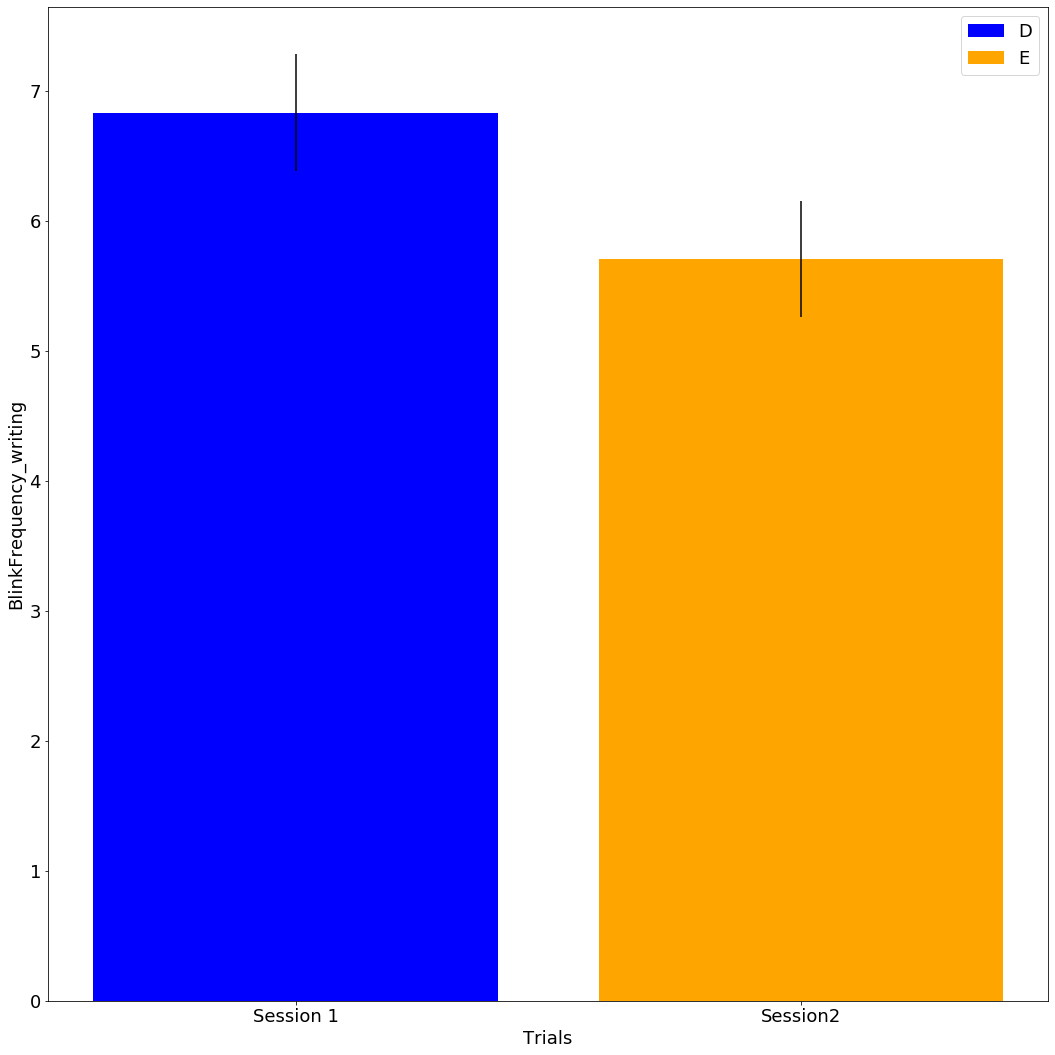

In [10]:


variable = 'BlinkFrequency_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), yerr = df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('BlinkFrequency_writing')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




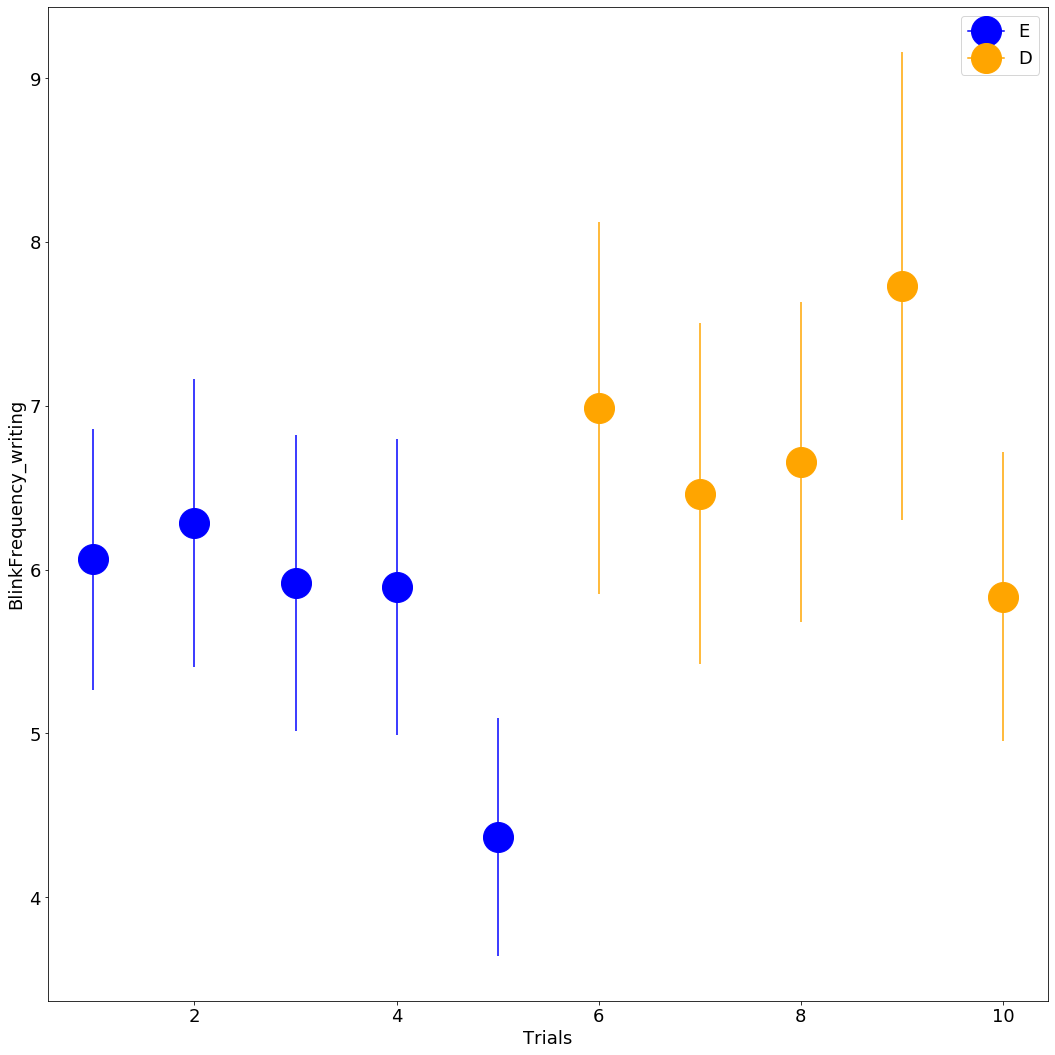

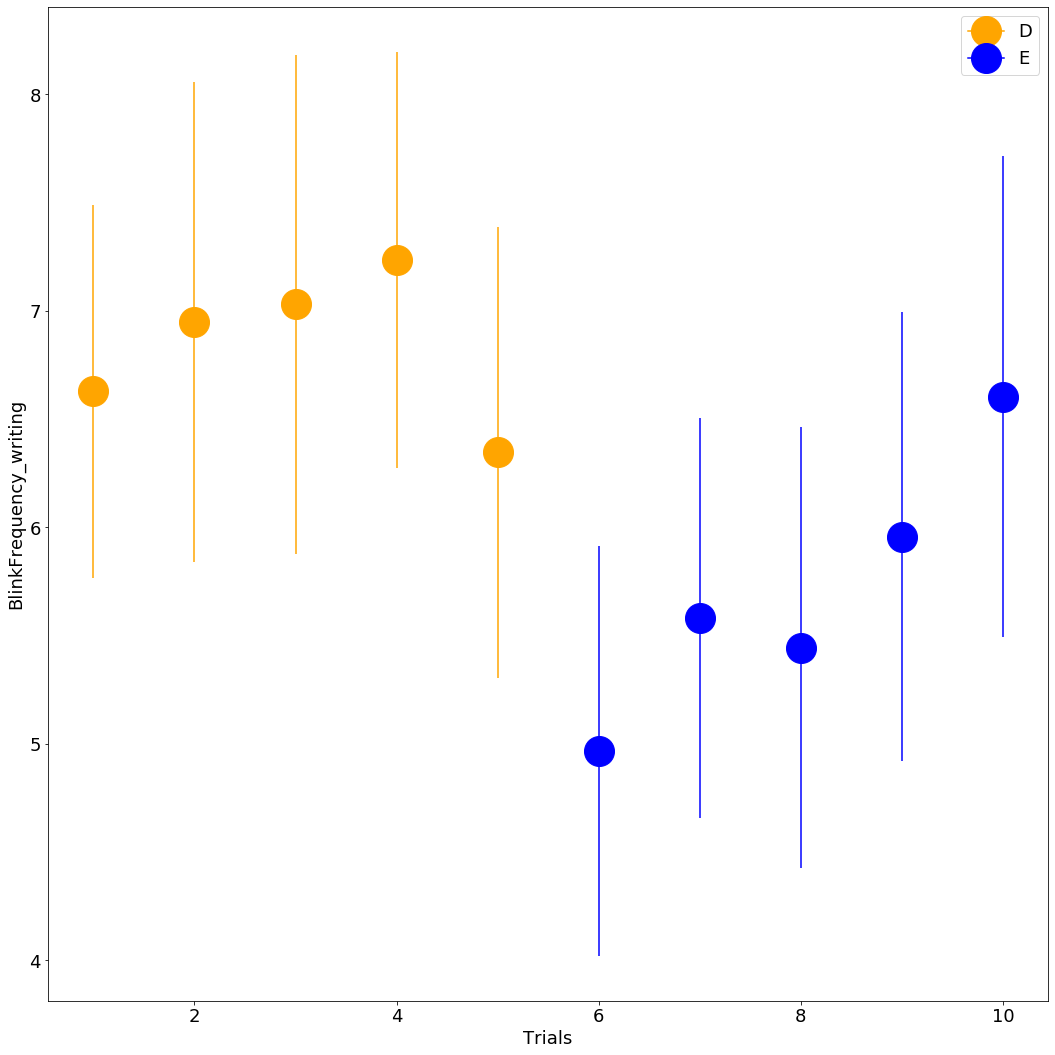

In [11]:


variable = 'BlinkFrequency_writing'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('BlinkFrequency_writing')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BlinkFrequency_writing_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






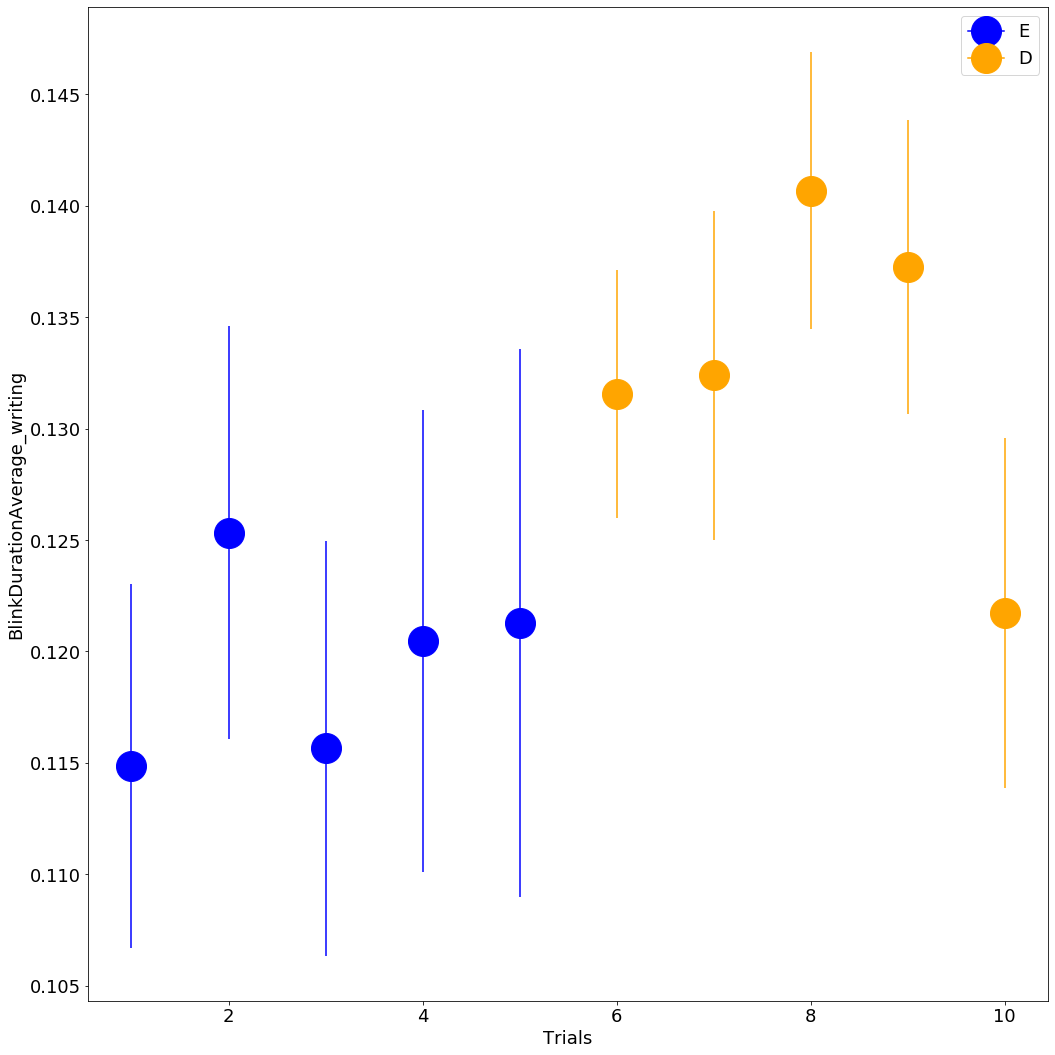

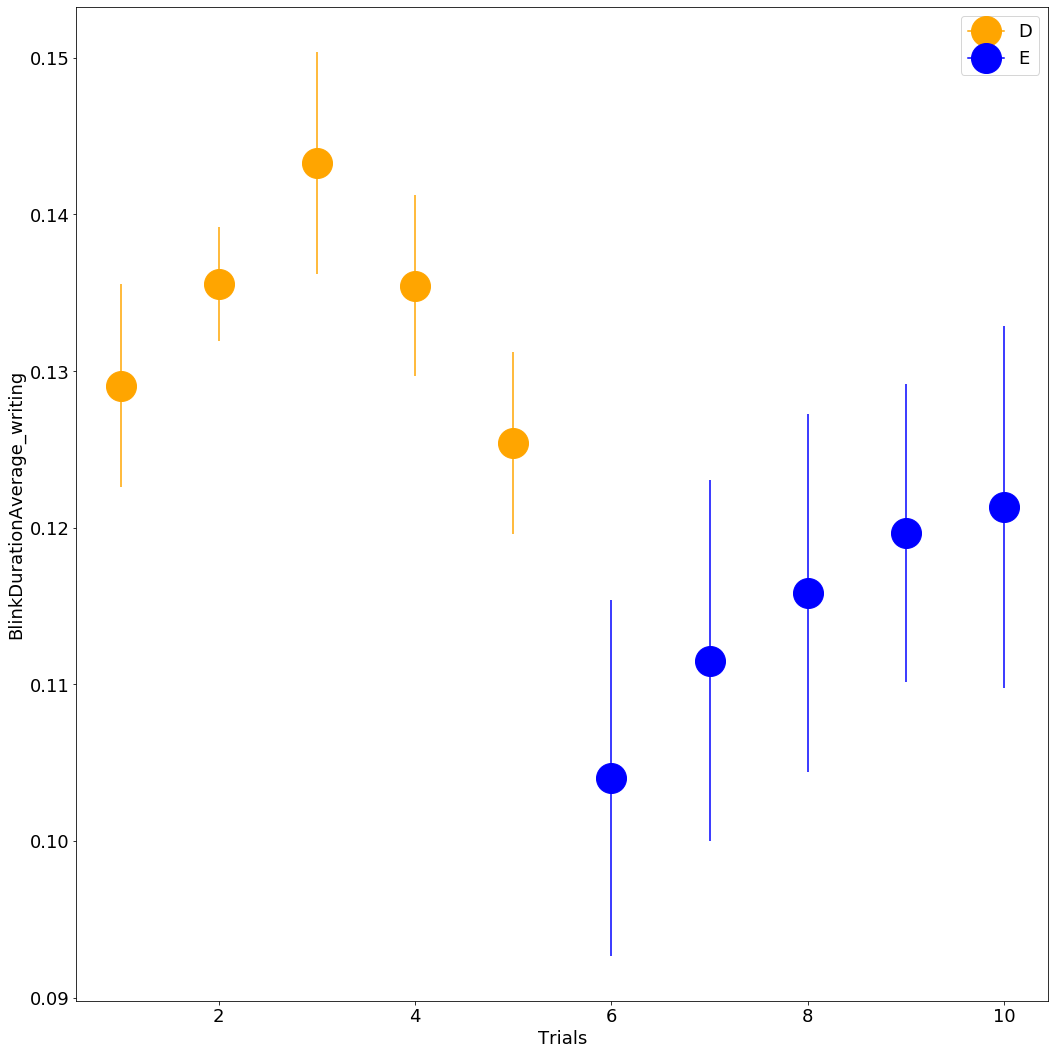

In [12]:


variable = 'BlinkDurationAverage_writing'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('BlinkDurationAverage_writing')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BlinkDurationAverage_writing_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






0.7729619533842282 0.08791622465698364


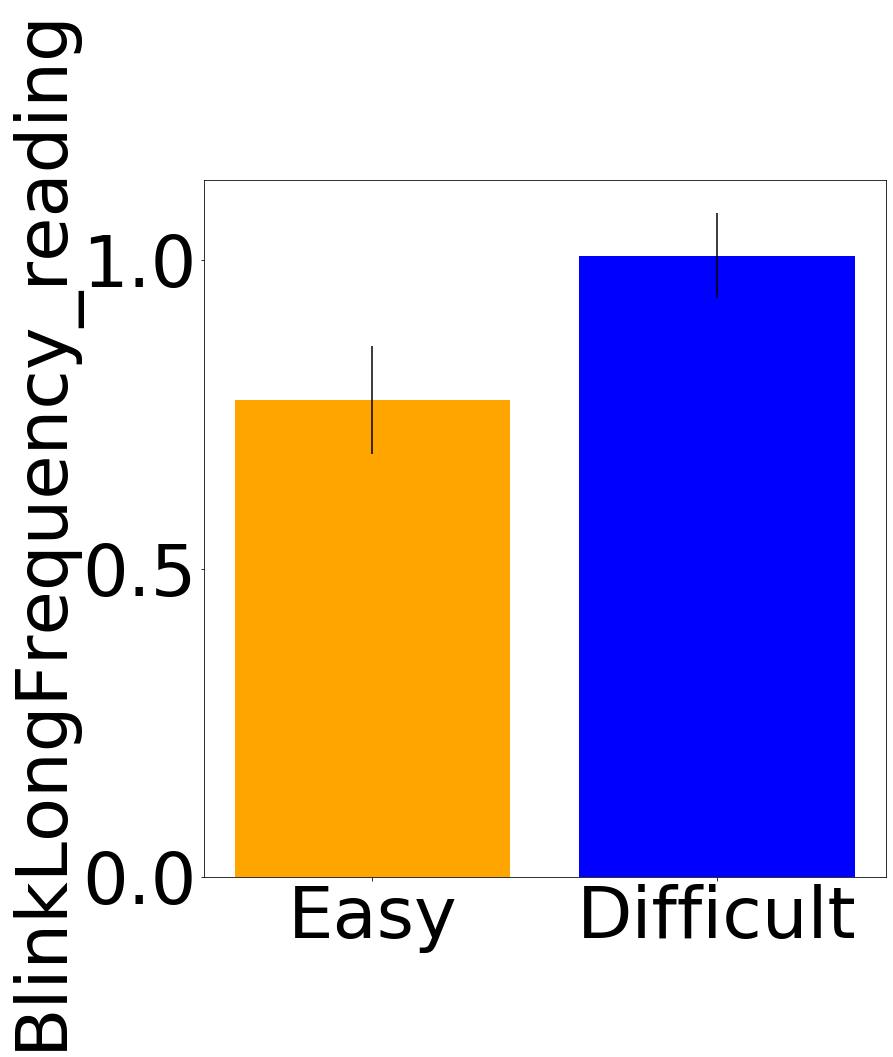

In [16]:
PlotTitle = 'BlinkLongFrequency_reading'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'BlinkLongFrequency_reading'

label_fontSize = 72
others_fontSize = 62

x_inds = [1,2]

list1 = list()
x_list1 = list()

plt.rcParams.update({'font.size': label_fontSize})

print(df1[variable][df1.SessionDifficulty=='E'].mean(), df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()))

ind = 0
p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)

#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([0, 0.25])
ax1.set_ylabel('BlinkLongFrequency_reading')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])

#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
#maxTime = 7
#y_time, h, col = maxTime, 0.1, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\BlinkLongFrequency_reading.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

0.14749893548327675 0.017626817498818923


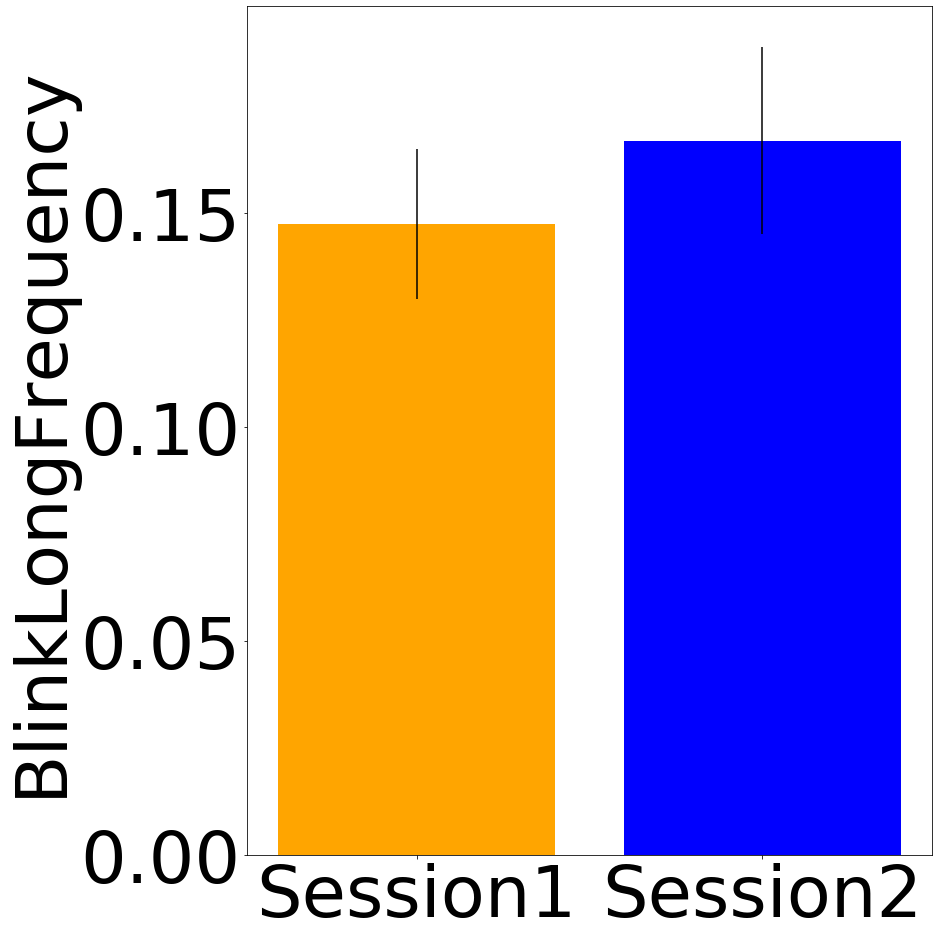

In [20]:
PlotTitle = 'BlinkLongFrequency_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'BlinkLongFrequency_writing'

label_fontSize = 72
others_fontSize = 62

x_inds = [1,2]

list1 = list()
x_list1 = list()

plt.rcParams.update({'font.size': label_fontSize})

print(df1[variable][df1.Session==1].mean(), df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.Session==1].count()))

ind = 0
p1 = ax1.bar(x_inds[ind], df1[variable][df1.Session==1].mean(), yerr = \
                 df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.Session==1].count()), color='orange', label='Easy')
    
p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Session==2].mean(), yerr = \
                 df1[variable][df1.Session==2].std()/np.sqrt(df1[variable][df1.Session==2].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)

#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session1', 'Session2'])
#ax1.set_ylim([0, 0.25])
ax1.set_ylabel('BlinkLongFrequency')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])

#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
#maxTime = 7
#y_time, h, col = maxTime, 0.1, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\BlinkLongFrequency_writing.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

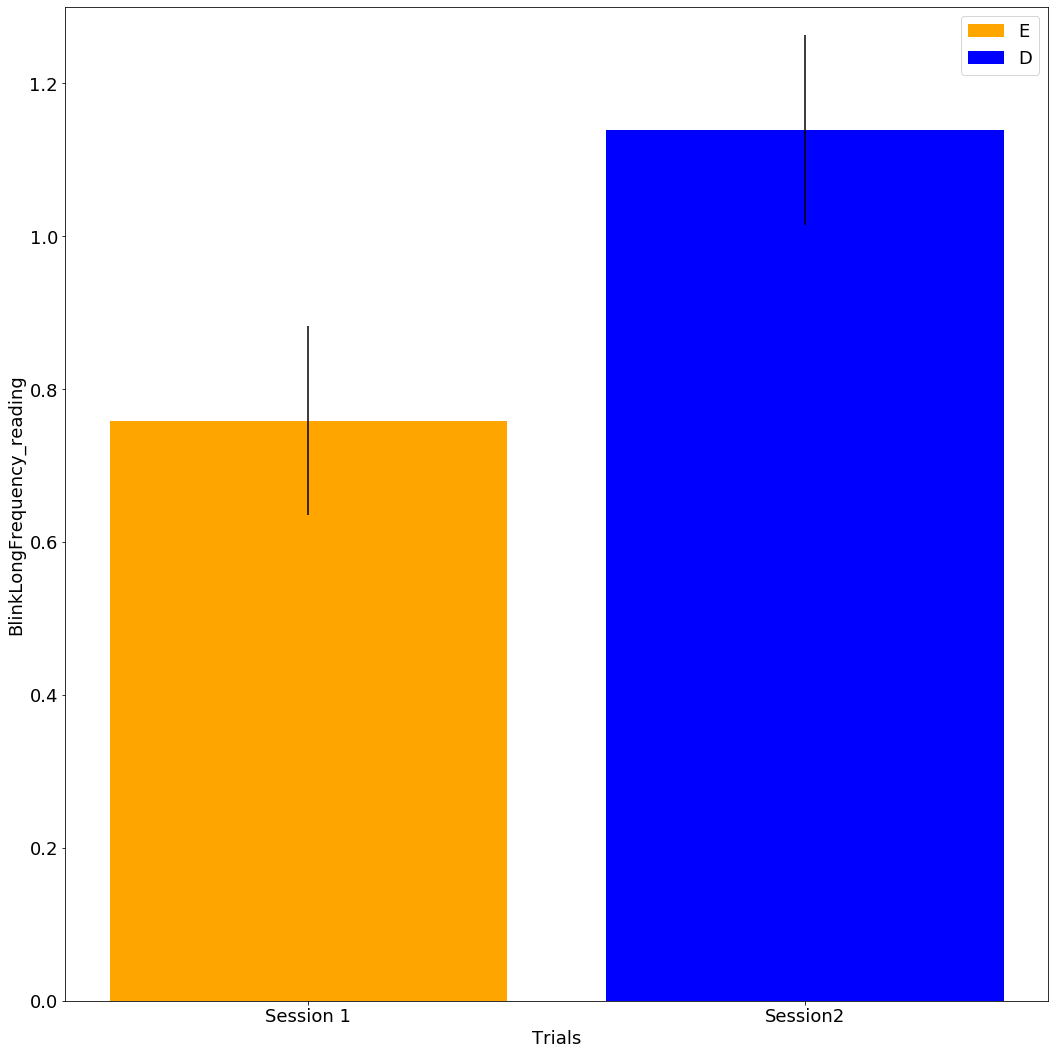

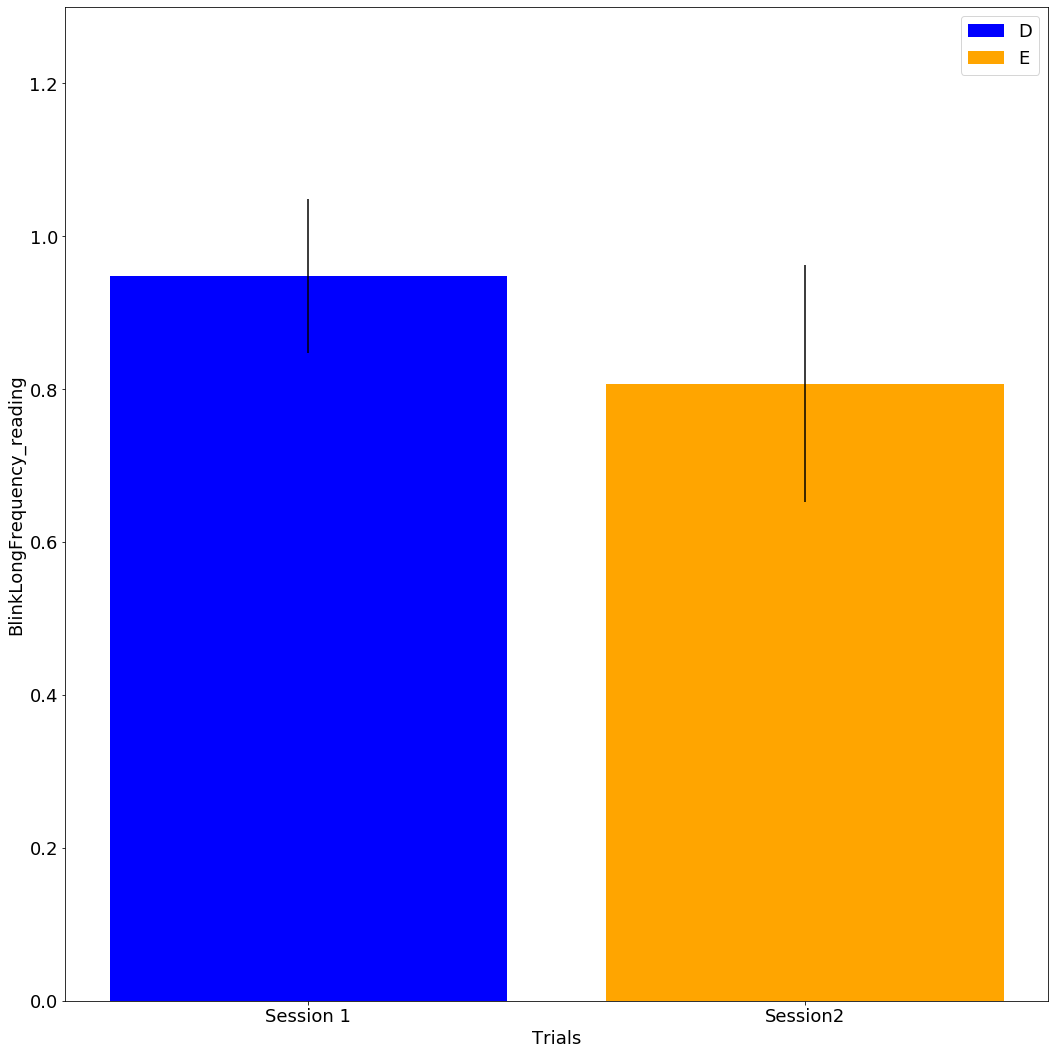

In [23]:


variable = 'BlinkLongFrequency_reading'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), yerr = df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('BlinkLongFrequency_reading')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    ax1.set_ylim([0, 1.3])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BlinkLongFrequency_reading_Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    

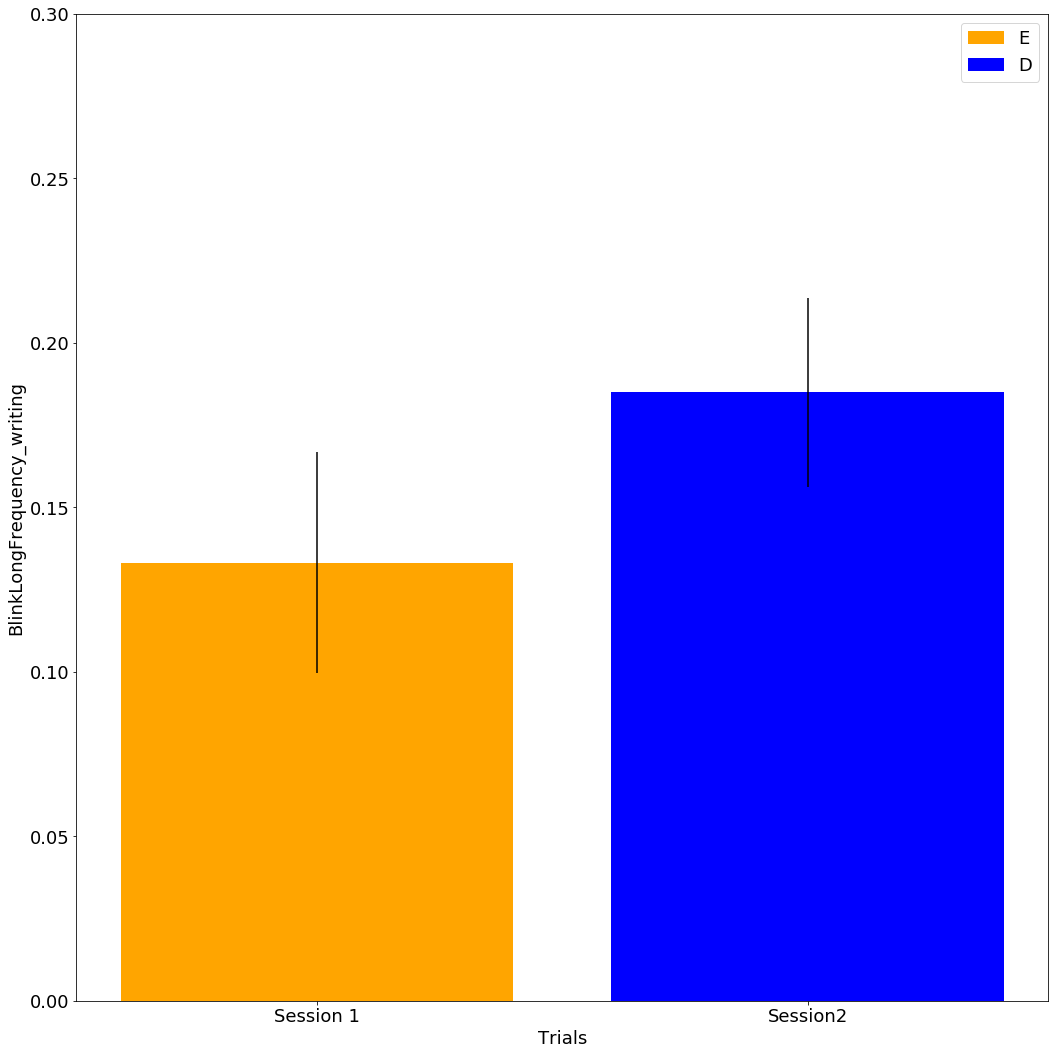

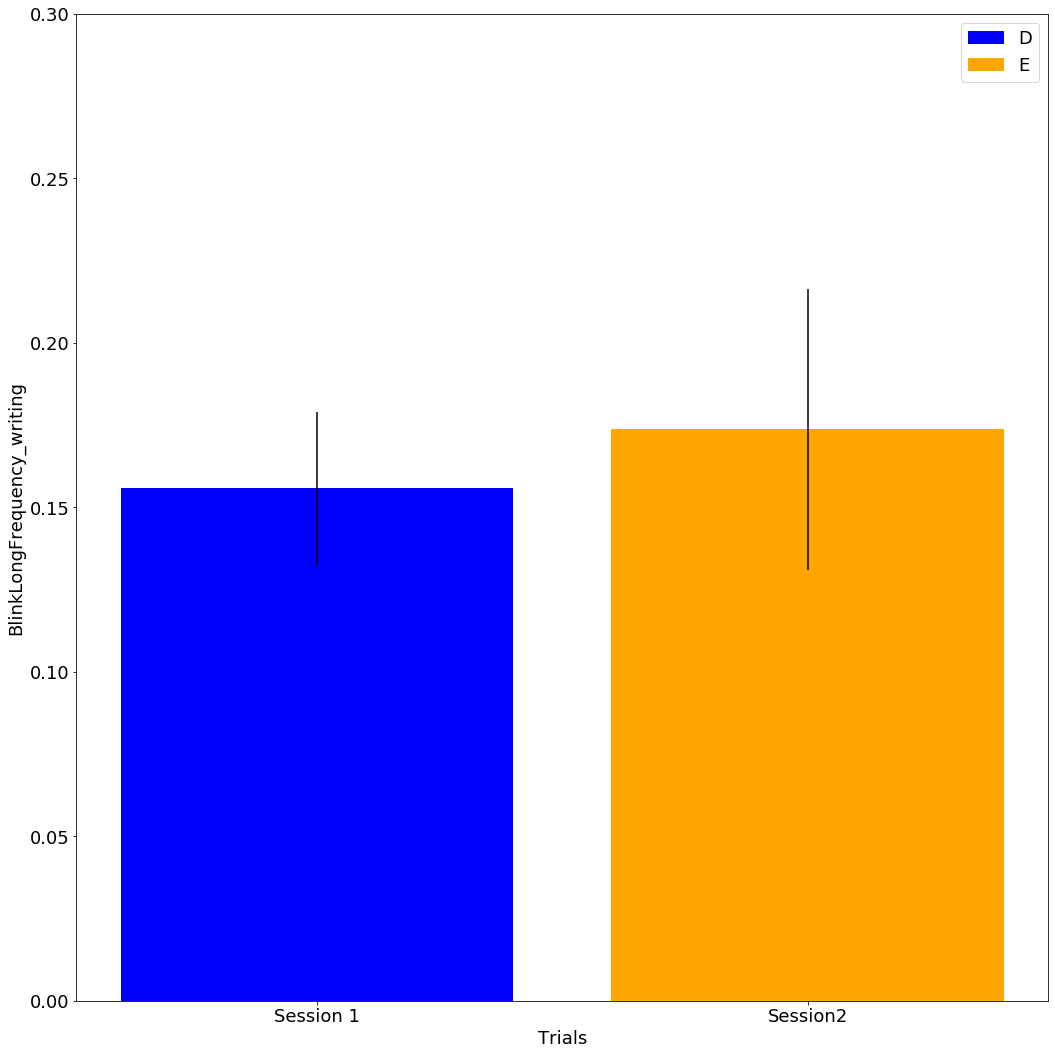

In [25]:


variable = 'BlinkLongFrequency_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), yerr = df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('BlinkLongFrequency_writing')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    ax1.set_ylim([0, 0.3])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BlinkLongFrequency_writing_Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    

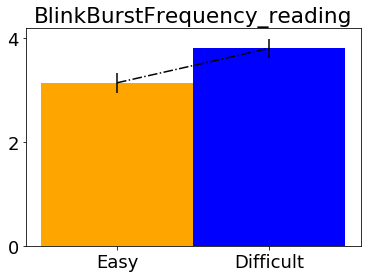

In [26]:
PlotTitle = 'BlinkBurstFrequency_reading'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkBurstFrequency_reading']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


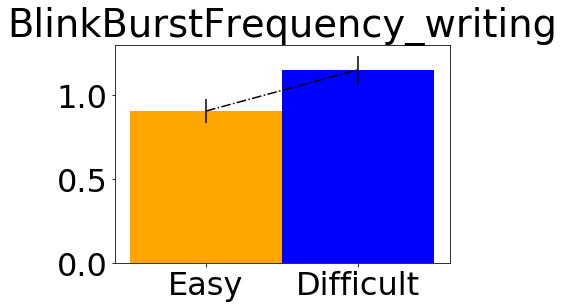

In [27]:
PlotTitle = 'BlinkBurstFrequency_writing'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkBurstFrequency_writing']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


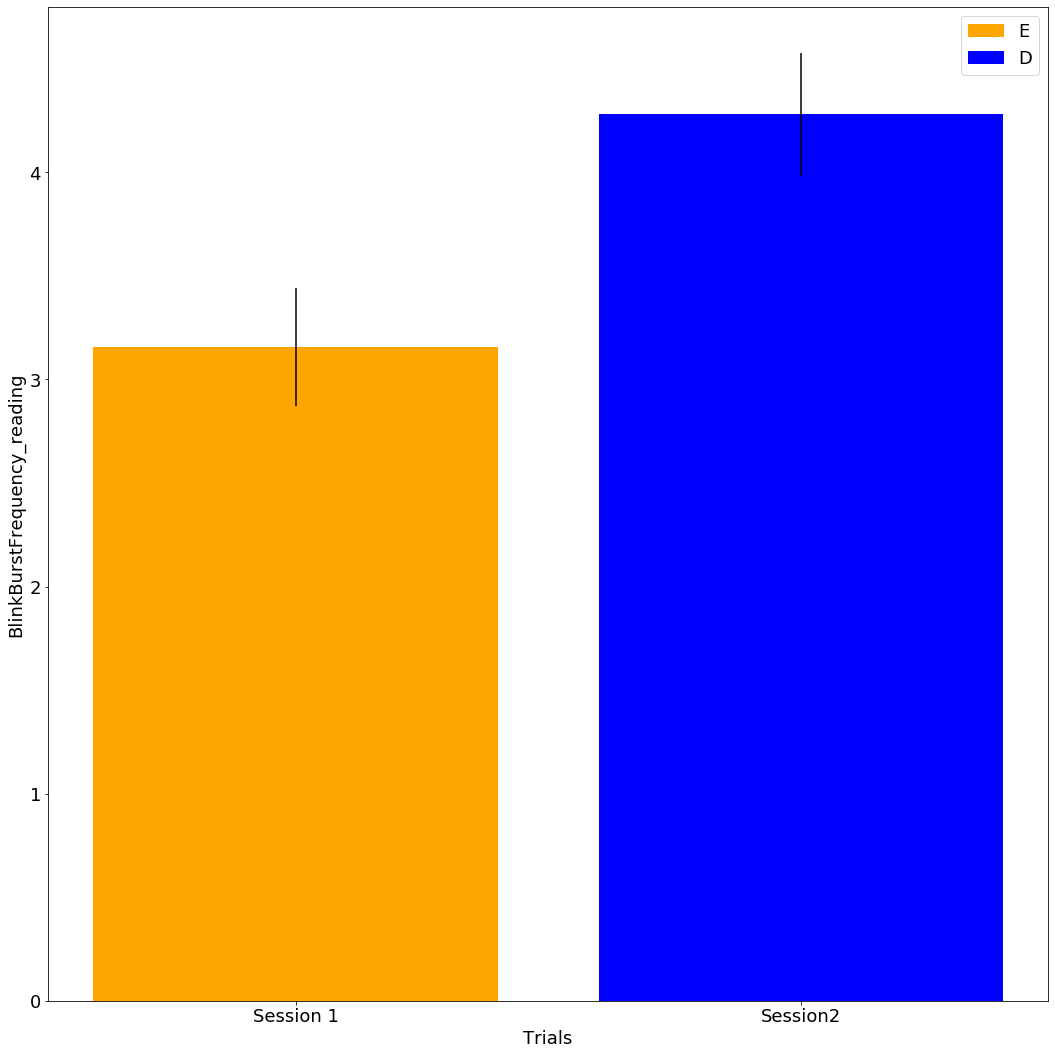

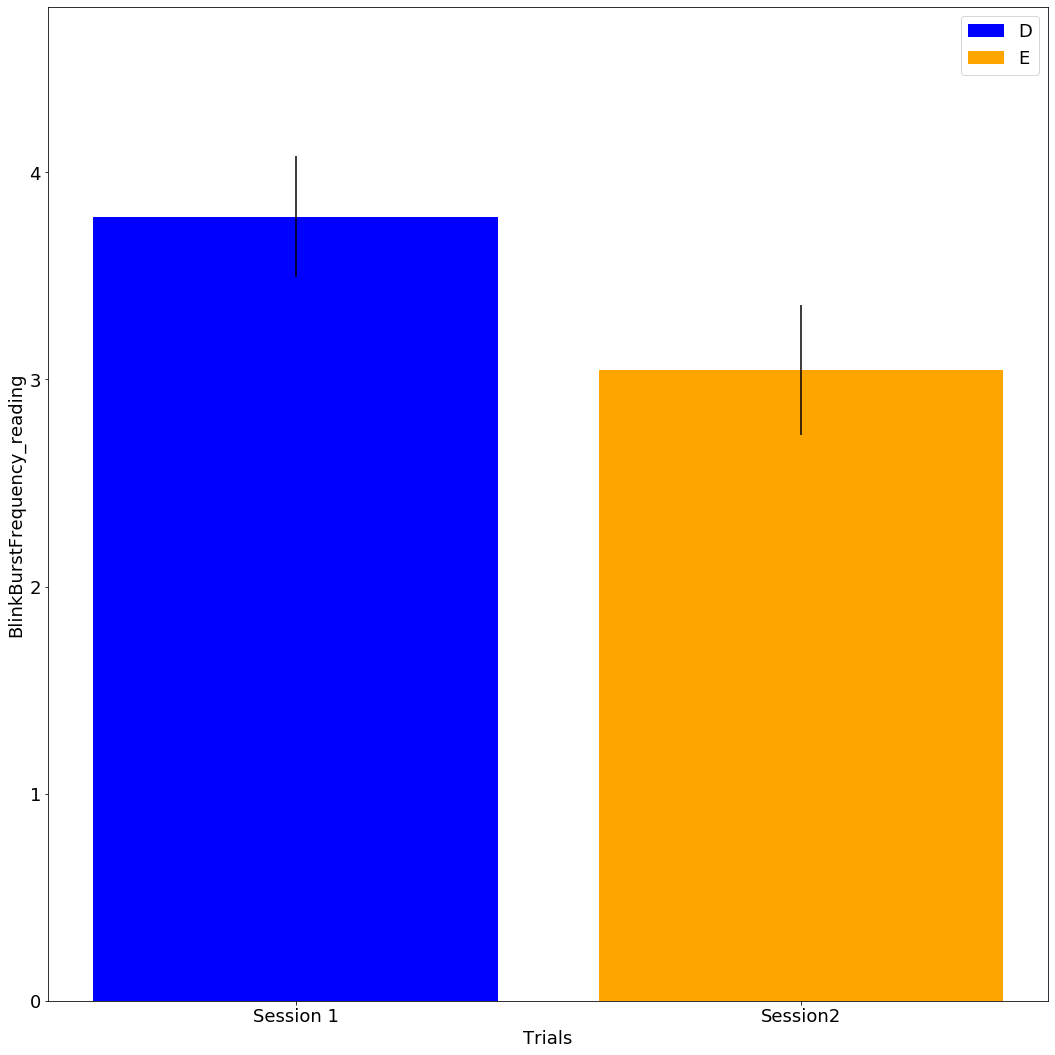

In [31]:


variable = 'BlinkBurstFrequency_reading'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), yerr = df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('BlinkBurstFrequency_reading')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    ax1.set_ylim([0, 4.8])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\BlinkBurstFrequency_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    

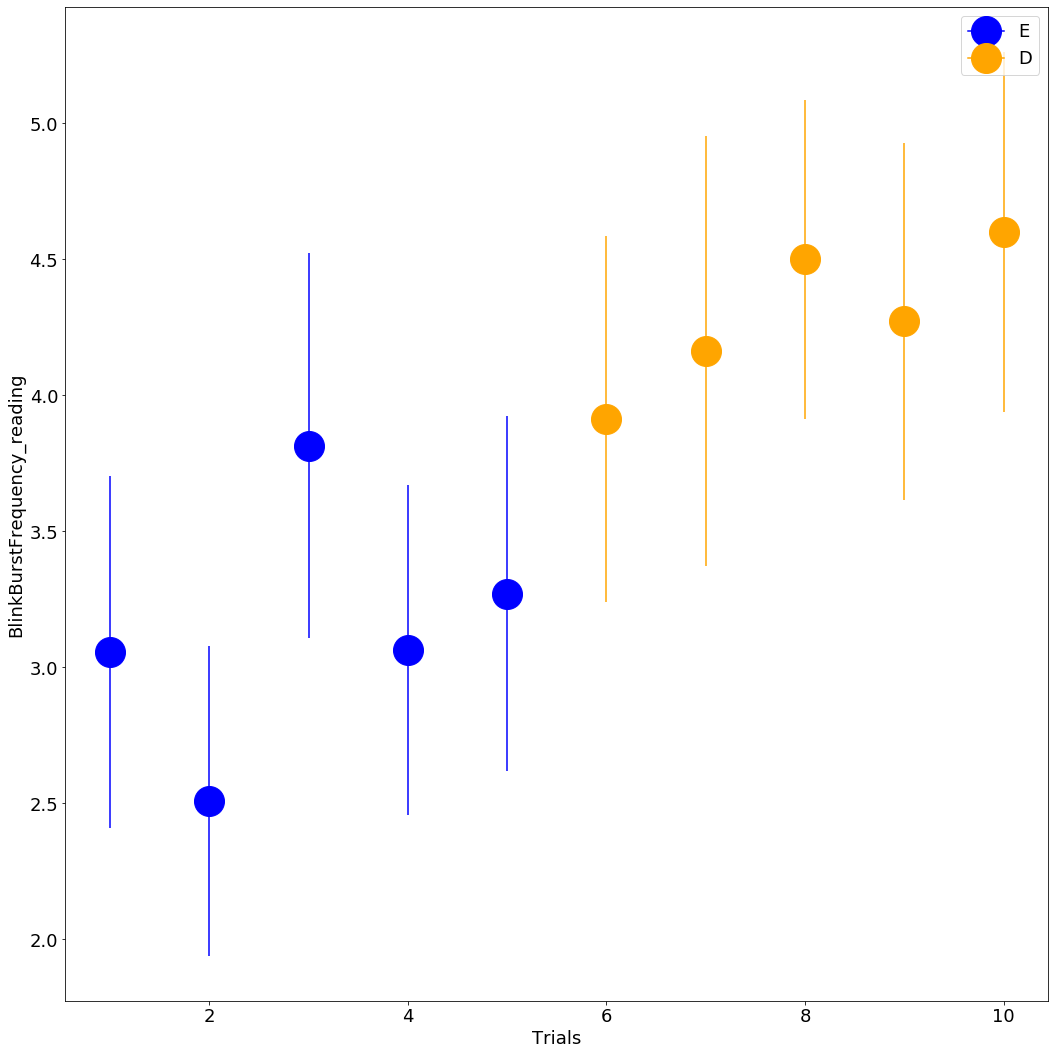

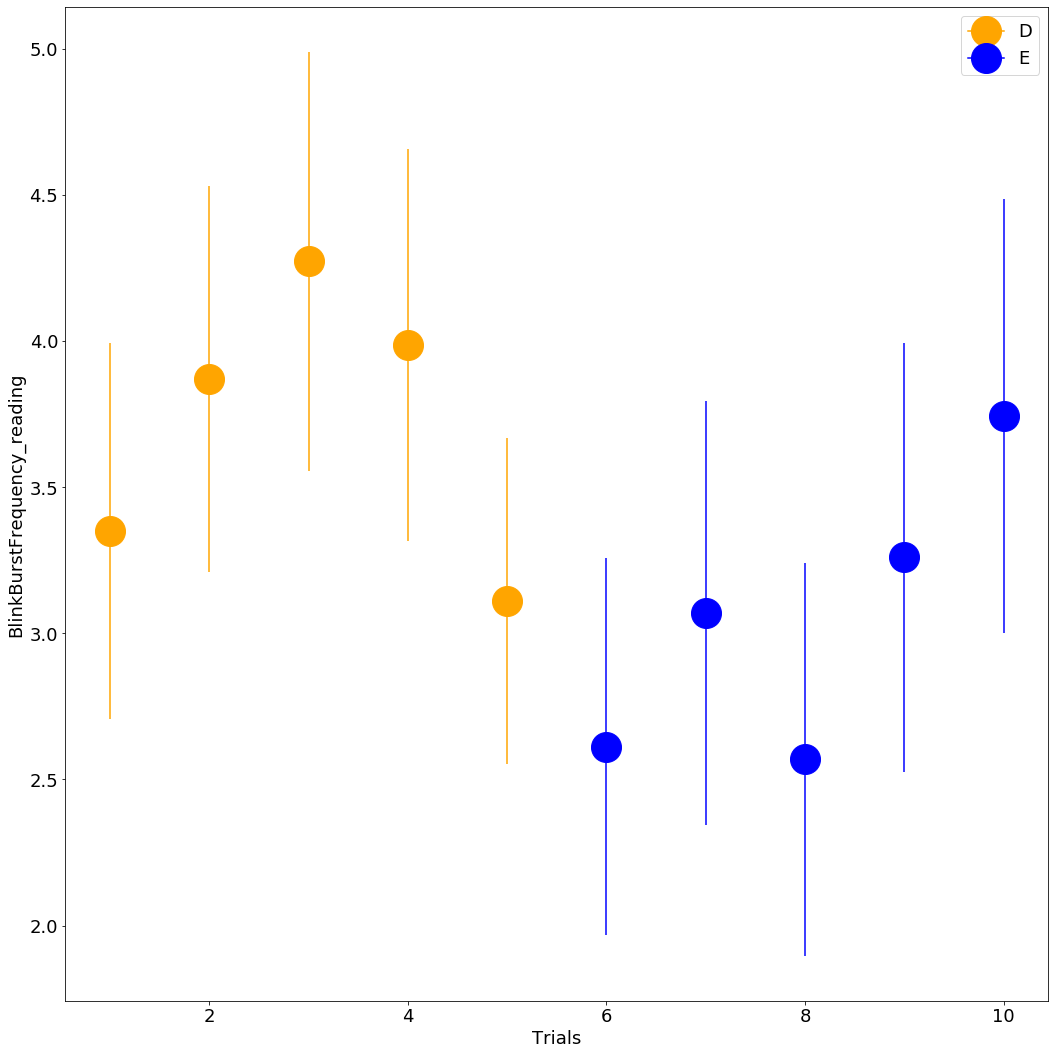

In [33]:


variable = 'BlinkBurstFrequency_reading'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('BlinkBurstFrequency_reading')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 3.2])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\BlinkBurstFrequency_reading_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






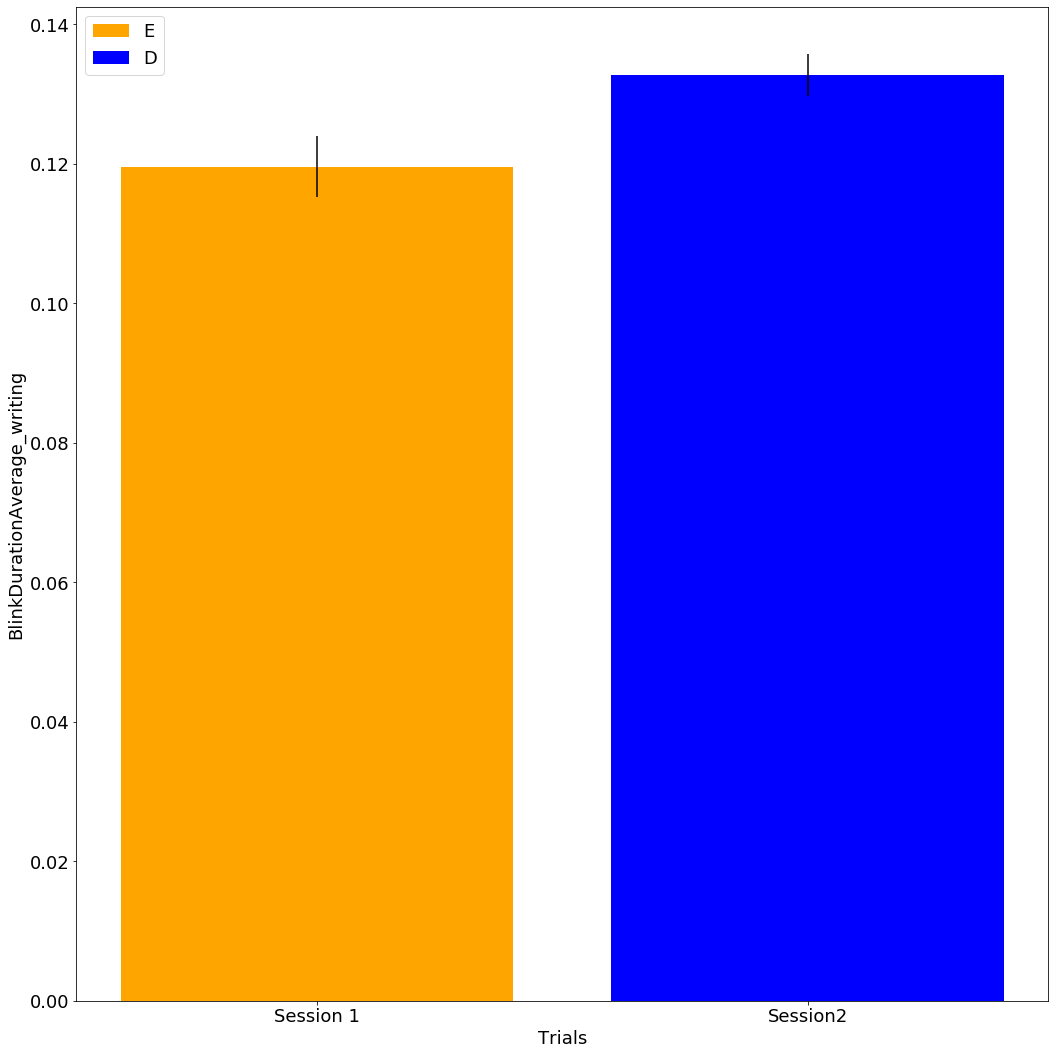

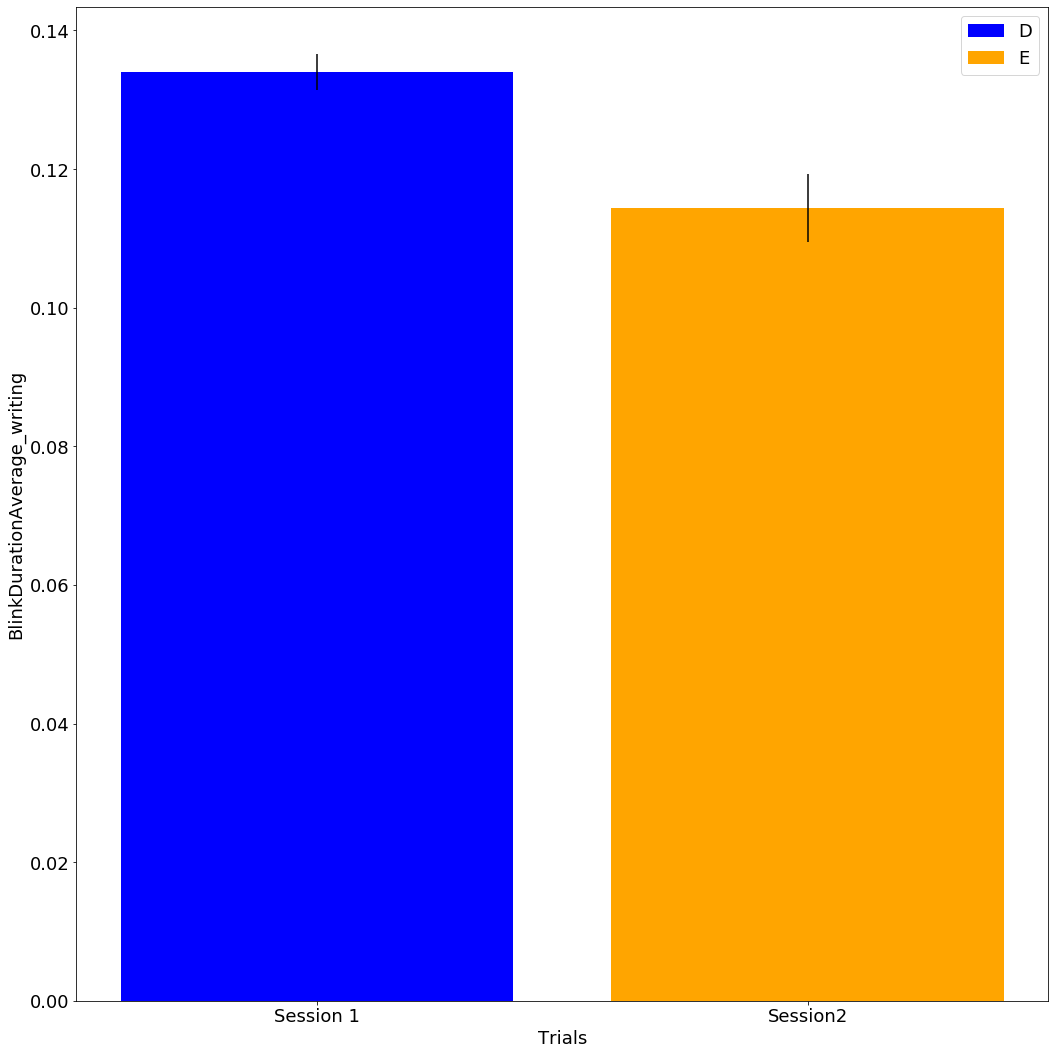

In [34]:


variable = 'BlinkDurationAverage_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), yerr = df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), \
                 yerr = df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('BlinkDurationAverage_writing')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    

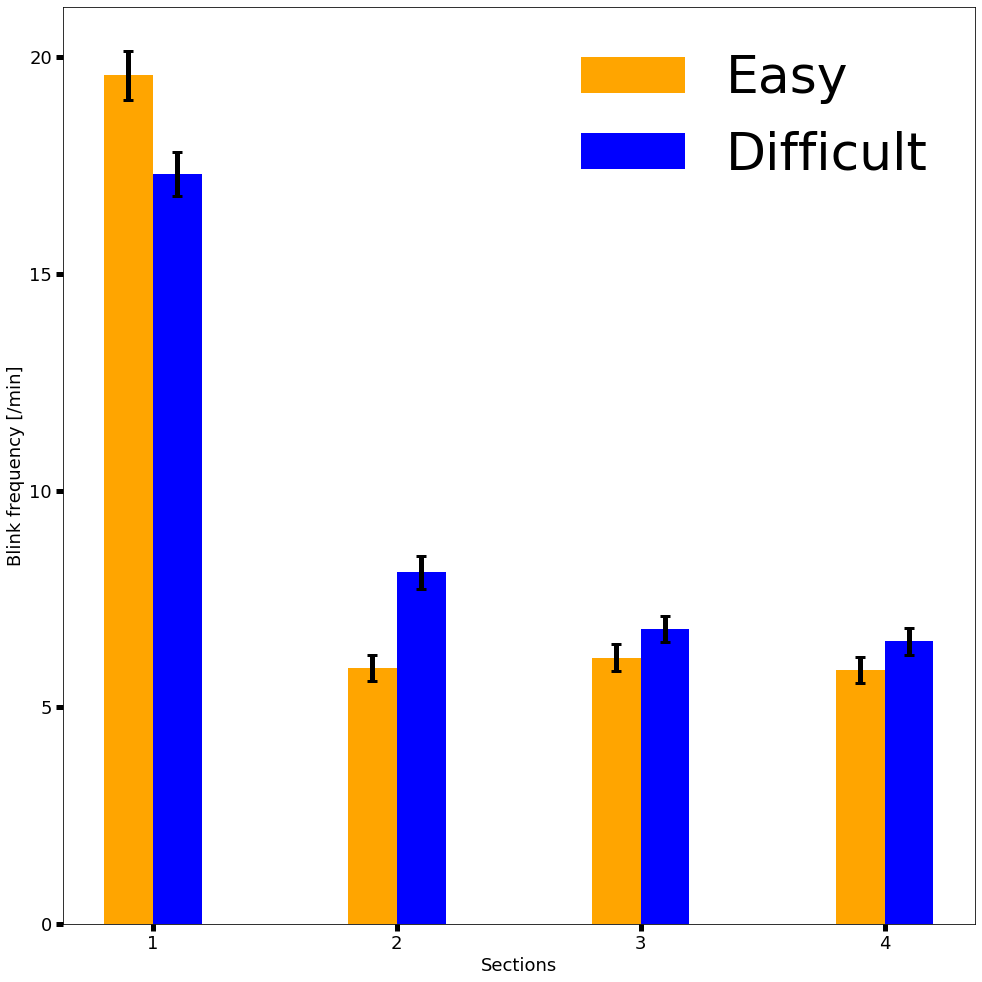

In [10]:
PlotTitle = 'blink Pattern'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['blinkFrequency1', 'blinkFrequency2', 'blinkFrequency3', 'blinkFrequency4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()\
                 ), color='orange', label='Easy', width = 0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    p2 = ax1.bar(x_inds[ind]+0.5, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()\
                ), color='blue', label='Difficult', width = 0.5, error_kw=dict(lw=5, capsize=5, capthick=3))

    
    
ax1.set_xticks([1.25,3.75,6.25,8.75])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['1', '2', '3', '4'])
plt.rcParams.update({'font.size': 52})
ax1.set_ylabel('Blink frequency [/min]')
ax1.set_xlabel('Sections')
ax1.legend((p1, p2), ('Easy', 'Difficult'), frameon=False)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)

plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\BlinkFrequency_sections.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Blink rate over days

In [7]:
PlotTitle = 'BlinkFrequency_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkFrequency_writing']



label_fontSize = 18
others_fontSize = 12

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'BlinkFrequency_writing'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
#ax1.set_ylim([0, 0.5])
ax1.set_ylabel('Blink Frequency')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\BlinkFrequency_writing_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

### BlinkFrequency for easy and difficult sessions for all days

In [13]:
easy_list, difficult_list = list(), list()

for subject in np.unique(df1.Subject):
    plt.figure()
        
    for day in ['1','2','3','4','5']:
        easy_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.SessionDifficulty=='E'), df1.DayNr==day)]
        difficult_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.SessionDifficulty=='D'), df1.DayNr==day)]
        day_list = df1.Day[np.logical_and(df1.Subject==subject, df1.DayNr==day)].tolist()
        if len(day_list)>0:
            if len(day_list[0]) > 1:
                typingTechnique = 'multi-key selection'
            
                plt.plot([int(day)]*len(easy_list), easy_list, '*b')
                plt.plot([int(day)]*len(difficult_list), difficult_list, '*r')
            else:
                plt.plot([int(day)]*len(easy_list), easy_list, 'ob')
                plt.plot([int(day)]*len(difficult_list), difficult_list, 'or')
        
        easy_list, difficult_list = list(), list()
    plt.ylim([0,40])
    plt.title(subject)
    plt.xlabel('Days')
    plt.ylabel('BlinkFrequency')

### BlinkFrequency for 1st and 2nd sessions for all days

In [51]:
easy_list, difficult_list = list(), list()

for subject in np.unique(df1.Subject):
    fig = plt.figure()
    ax1 = fig.add_subplot()
        
    for day in ['1','2','3','4','5']:
        easy_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.Session==1), df1.DayNr==day)]
        difficult_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.Session==2), df1.DayNr==day)]
        day_list = df1.Day[np.logical_and(df1.Subject==subject, df1.DayNr==day)].tolist()
        if len(day_list)>0:
            if len(day_list[0]) > 1:
                typingTechnique = 'multi-key selection'
            
                ax1.plot([int(day)]*len(easy_list), easy_list, '*b')
                ax1.plot([int(day)]*len(difficult_list), difficult_list, '*r')
            else:
                p1 = ax1.plot([int(day)]*len(easy_list), easy_list, 'ob', label='Session1')
                p2 = ax1.plot([int(day)]*len(difficult_list), difficult_list, 'or', label = 'Session2')
        
        easy_list, difficult_list = list(), list()
    ax1.set_title(subject)
    plt.rcParams.update({'font.size': 12})
    ax1.set_xlabel('Days')
    ax1.set_ylabel('BlinkFrequency')
    ax1.legend((p1,p2))

In [39]:
PlotTitle = 'BlinkFrequency_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkFrequency_writing']

label_fontSize = 72
others_fontSize = 62

x_inds = [1,2]

list1 = list()
x_list1 = list()

plt.rcParams.update({'font.size': label_fontSize})

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.Session==1].mean())
    list1.append(df1[variable][df1.Session==2].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.Session==1].mean(), yerr = \
                 df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.Session==1].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Session==2].mean(), yerr = \
                 df1[variable][df1.Session==2].std()/np.sqrt(df1[variable][df1.Session==2].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)

#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session 1', 'Session 2'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Blink frequency')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])

#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
#maxTime = 7
#y_time, h, col = maxTime, 0.1, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\blinkFrequency_session.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [38]:
PlotTitle = 'BlinkFrequency_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkFrequency_writing']

label_fontSize = 72
others_fontSize = 62

x_inds = [1,2]

list1 = list()
x_list1 = list()

plt.rcParams.update({'font.size': label_fontSize})

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.Language=='EN'].mean())
    list1.append(df1[variable][df1.Language=='DA'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.Language=='EN'].mean(), yerr = \
                 df1[variable][df1.Language=='EN'].std()/np.sqrt(df1[variable][df1.Language=='EN'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Language=='DA'].mean(), yerr = \
                 df1[variable][df1.Language=='DA'].std()/np.sqrt(df1[variable][df1.Language=='DA'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)

#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['English', 'Danish'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Blink frequency')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])

#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
#maxTime = 7
#y_time, h, col = maxTime, 0.1, 'k'
#ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\blinkFrequency_language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

### BlinkFrequency average over sessions

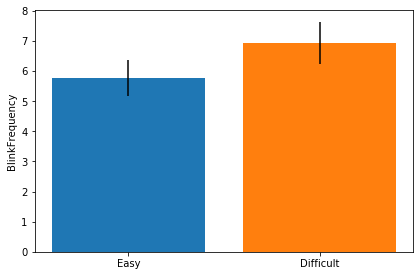

In [5]:
easy_list1, difficult_list1 = list(), list()

for subject in np.unique(df1.Subject):
    days = np.unique(df1.DayNr[df1.Subject==subject])
    for day in days:
        day_list = df1.Day[np.logical_and(df1.Subject==subject, df1.DayNr==day)].tolist()
        if len(day_list)>0:
            if len(day_list[0]) == 1:
                
                easy_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.SessionDifficulty=='E'), df1.DayNr==day)]
                difficult_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.SessionDifficulty=='D'), df1.DayNr==day)]
                easy_list.dropna(inplace=True)
                difficult_list.dropna(inplace=True)
                
                
                if len(easy_list) > 0:
                    easy_list1.append(np.nanmean(easy_list.tolist()))
                if len(difficult_list) > 0:
                    difficult_list1.append(np.nanmean(difficult_list.tolist()))
                
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(1, np.nanmean(easy_list1), yerr = np.nanstd(easy_list1)/np.sqrt(len(easy_list1)))
ax1.bar(2, np.nanmean(difficult_list1), yerr = np.nanstd(difficult_list1)/np.sqrt(len(difficult_list1)))
ax1.set_xticks([1,2])
ax1.set_xticklabels(['Easy', 'Difficult'])
plt.rcParams.update({'font.size': 12})
ax1.set_ylabel('BlinkFrequency')

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\blinkFrequency_averageSessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [86]:
df1

,Subject,Block,Language,Session,SessionDifficulty,Trial,ScoreDifficulty,BlinkCount_writing,BlinkFrequency_writing,BlinkDurationTotal_writing,...,blinkDurationAverage2,blinkDurationAverage3,blinkDurationAverage4,InterBlinkDuration1,InterBlinkDuration2,InterBlinkDuration3,InterBlinkDuration4,Correlation,BlockNr,TypingTechnique
0,ac,1,EN,1,E,0,4.0,23.0,14.515432,3.144444,...,0.160317,0.133333,0.119048,1.148485,3.259259,3.155556,4.246296,0.884633,1,DT
1,ac,1,EN,1,E,1,3.0,14.0,12.904871,1.788889,...,0.166667,0.164444,0.104444,2.452778,3.244444,4.905556,4.358333,0.884633,1,DT
2,ac,1,EN,1,E,2,3.0,7.0,11.351822,0.900000,...,0.133333,0.140741,0.105556,2.377778,4.733333,5.138889,4.255556,0.884633,1,DT
3,ac,1,EN,1,E,3,4.0,19.0,11.835499,2.466667,...,0.133333,0.135185,0.117778,1.475926,4.955556,4.988889,5.930556,0.884633,1,DT
4,ac,1,EN,1,E,4,4.0,6.0,9.257042,0.744444,...,0.122222,0.122222,0.127778,2.155556,5.788889,5.222222,5.266667,0.884633,1,DT
5,ac,1,EN,2,D,0,5.0,24.0,9.901849,3.211111,...,0.147619,0.098413,0.148889,2.741481,6.683333,6.000000,4.748148,0.867934,1,DT
6,ac,1,EN,2,D,1,6.0,41.0,10.052180,4.722222,...,0.186806,0.113889,0.118889,1.476520,2.643011,5.182222,8.234568,0.867934,1,DT
7,ac,1,EN,2,D,2,6.0,36.0,10.766267,3.855556,...,0.145185,0.111111,0.106667,1.454264,2.491571,7.135556,4.452381,0.867934,1,DT
8,ac,1,EN,2,D,3,6.0,42.0,10.719424,5.622222,...,0.161438,0.130994,0.142424,1.586364,4.880556,4.066667,7.132222,0.867934,1,DT
9,ac,1,EN,2,D,4,6.0,51.0,13.788647,6.411111,...,0.120000,0.130556,0.122222,2.344033,4.523810,4.342222,3.601961,0.867934,1,DT


Text(0, 0.5, 'BlinkFrequency')

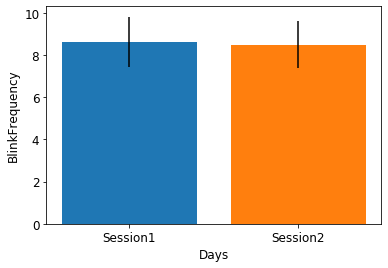

In [6]:
easy_list, difficult_list = list(), list()

for subject in np.unique(df1.Subject):
    days = np.unique(df1.DayNr[df1.Subject==subject])
    for day in days:
        day_list = df1.Day[np.logical_and(df1.Subject==subject, df1.DayNr==day)].tolist()
        if len(day_list)>0:
            if len(day_list[0]) == 1:
                easy_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.Session==1), df1.DayNr==day)]
                difficult_list = df1.BlinkFrequency_writing[np.logical_and(np.logical_and(df1.Subject==subject, df1.Session==2), df1.DayNr==day)]
        
              
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(1, np.mean(easy_list), yerr = np.std(easy_list)/np.sqrt(len(easy_list)))
ax1.bar(2, np.mean(difficult_list), yerr = np.std(difficult_list)/np.sqrt(len(difficult_list)))
ax1.set_xticks([1,2])
ax1.set_xticklabels(['Session1', 'Session2'])
plt.rcParams.update({'font.size': 12})
ax1.set_xlabel('Days')
ax1.set_ylabel('BlinkFrequency')


## Blink frequency on sections of typing

In [ ]:
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)


label_fontSize = 18
others_fontSize = 12


x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'BlinkFrequency_writing'



for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue

    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
#ax1.set_ylim([0, 0.5])
ax1.set_ylabel('Blink Frequency')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\BlinkFrequency_writing_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

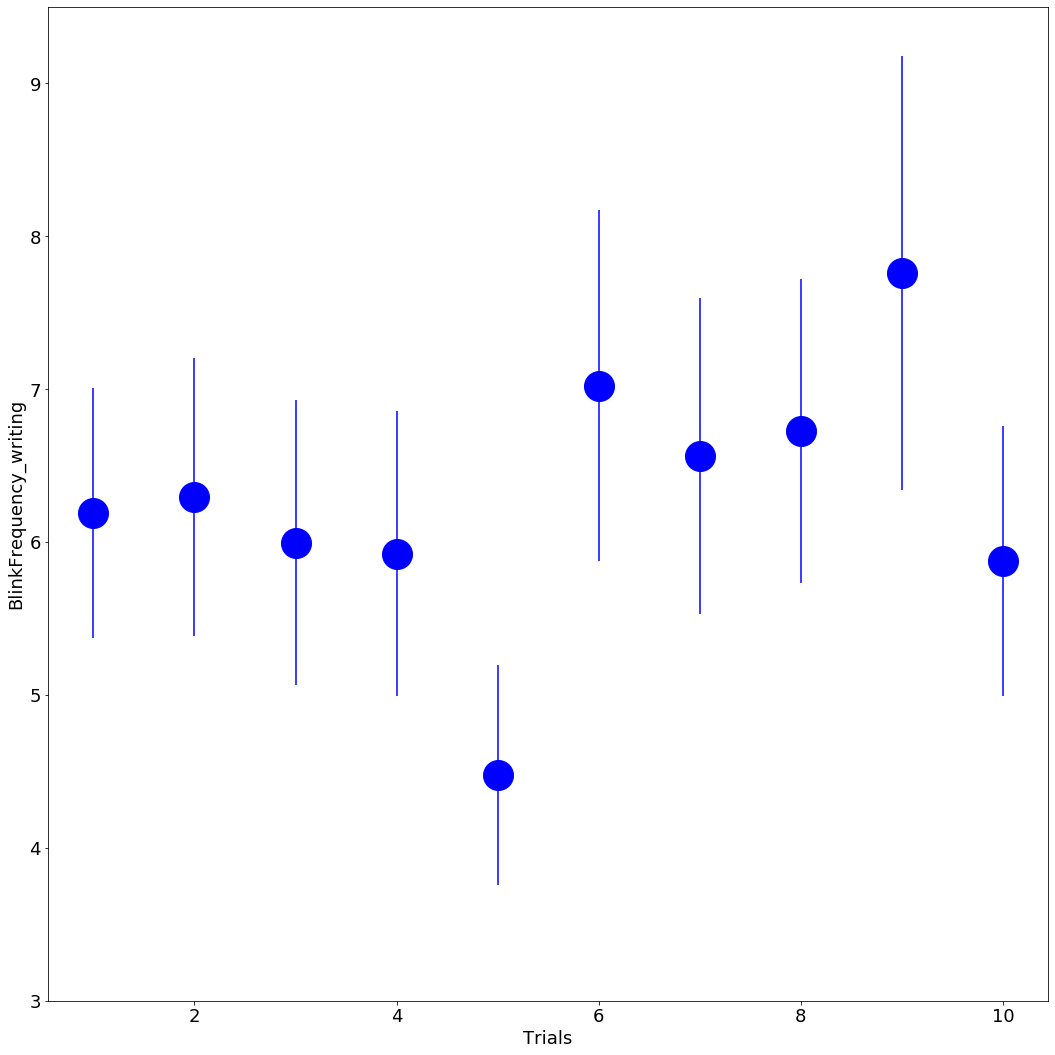

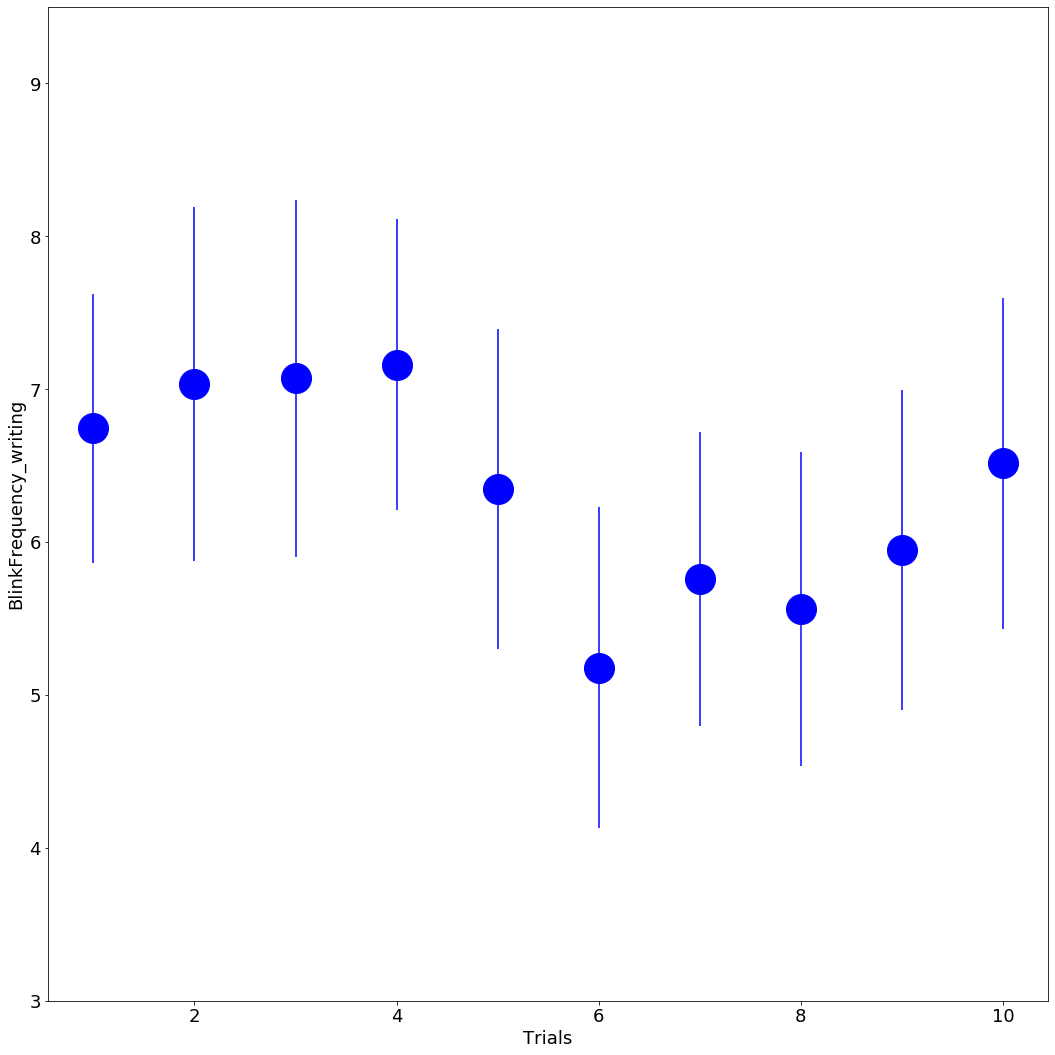

In [10]:


variable = 'BlinkFrequency_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('BlinkFrequency_writing')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([3, 9.5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\BlinkFrequency_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    




# BlinkDurationTotal

In [ ]:
PlotTitle = 'BlinkDurationTotal_writing'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkDurationTotal_writing']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


In [ ]:
PlotTitle = 'blink Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['blinkDurationTotal1', 'blinkDurationTotal2', 'blinkDurationTotal3', 'blinkDurationTotal4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    print(df1[variable][df1.SessionDifficulty=='D'].count())
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# BlinkDurationAverage_writing

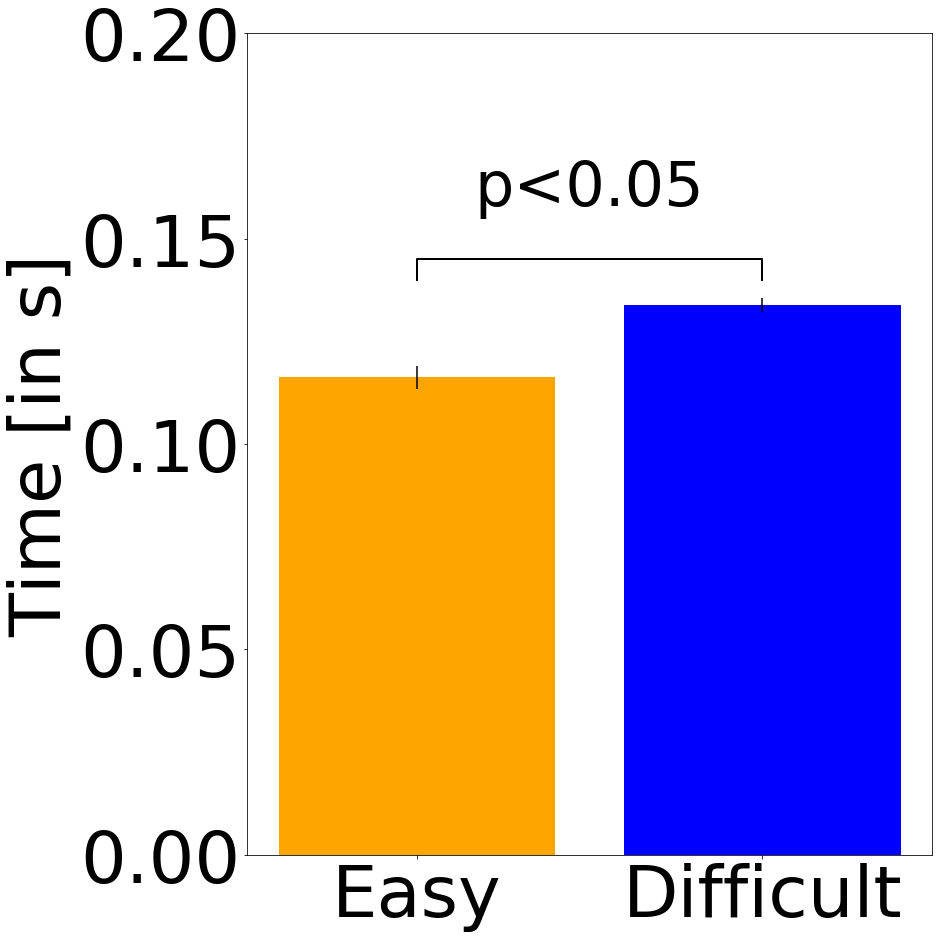

In [7]:
PlotTitle = 'BlinkDurationAverage_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['BlinkDurationAverage_writing']

label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    

ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.2])
ax1.set_ylabel('Time [in s]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
maxTime = 0.14
y_time, h, col = maxTime, 0.005, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.01, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\blinkDuration.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))


In [ ]:
PlotTitle = 'blink Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['blinkDurationAverage1', 'blinkDurationAverage2', 'blinkDurationAverage3', 'blinkDurationAverage4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    print(df1[variable][df1.SessionDifficulty=='D'].count())
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


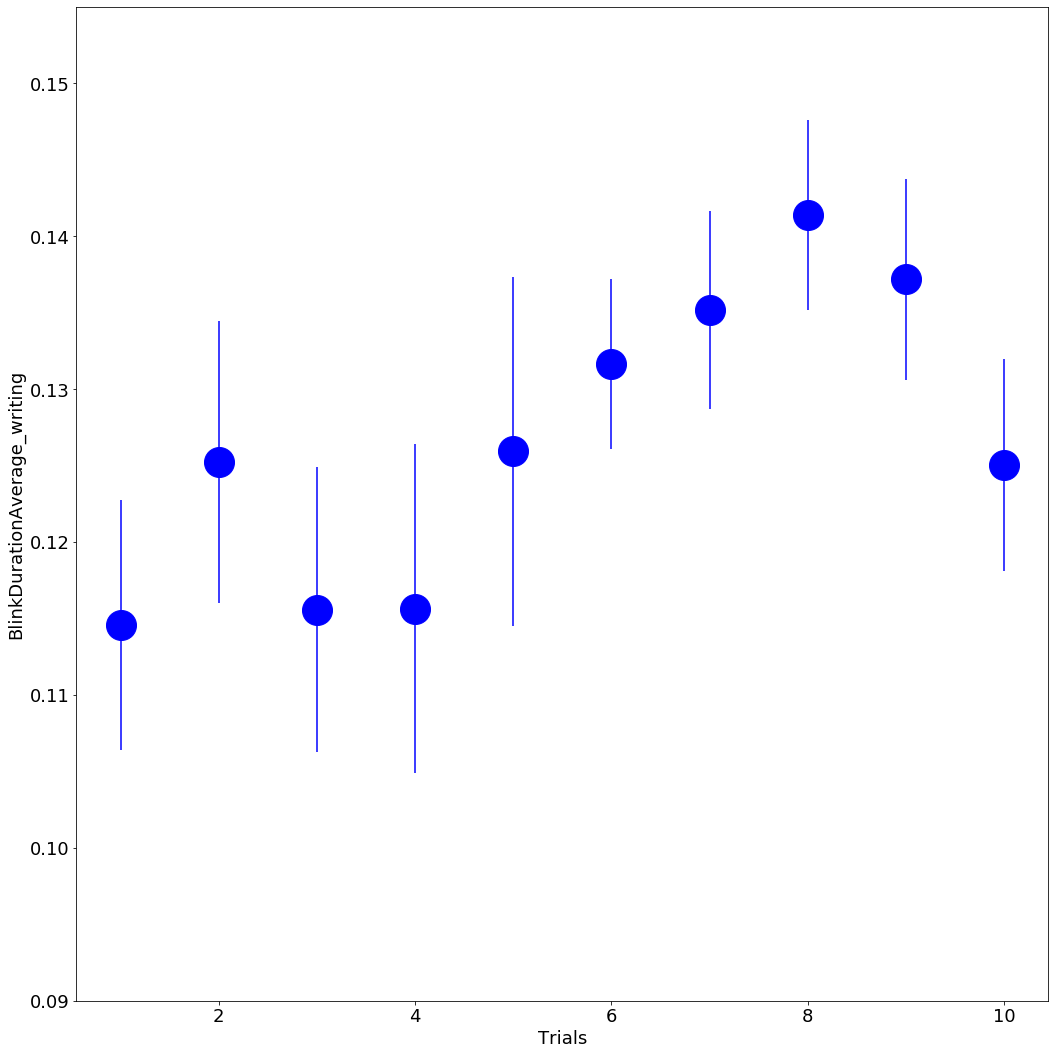

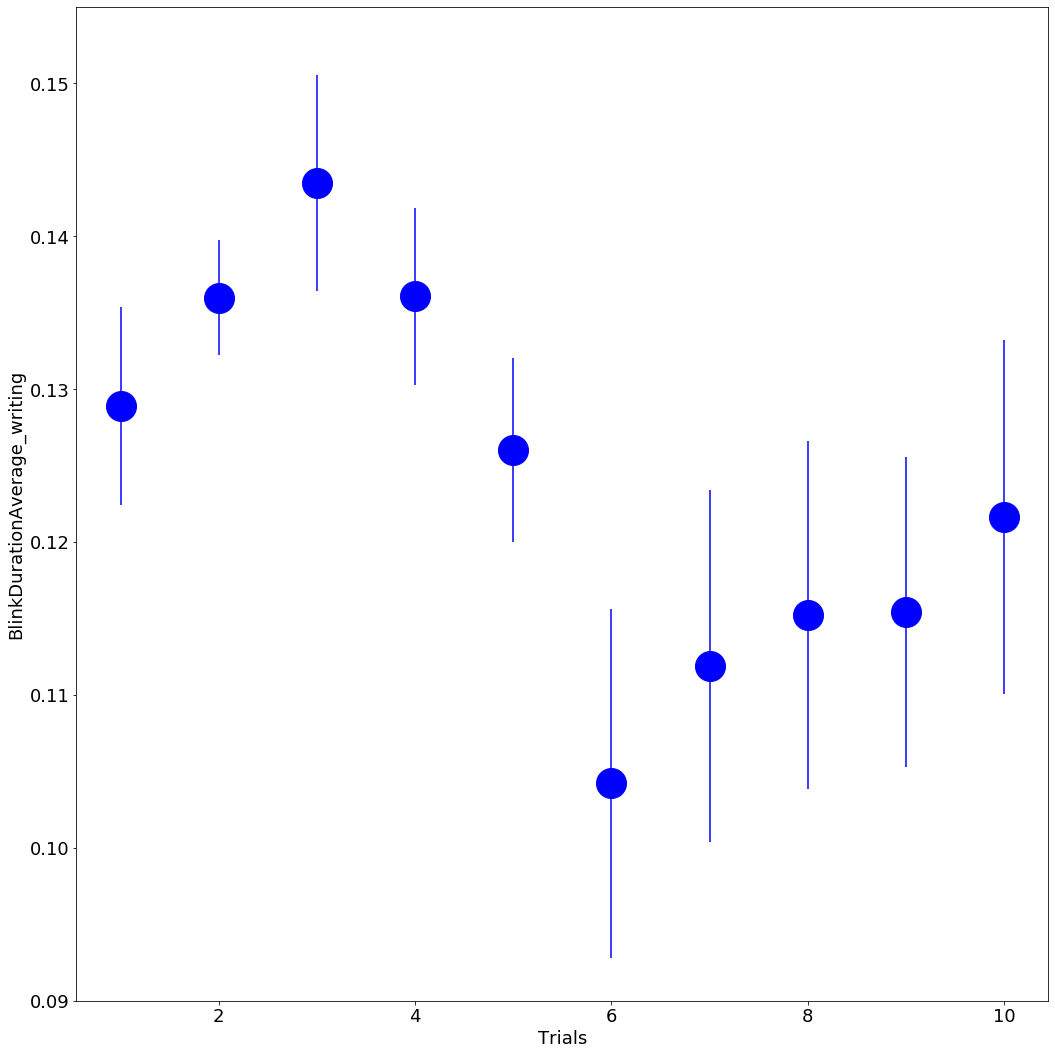

In [17]:
variable = 'BlinkDurationAverage_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('BlinkDurationAverage_writing')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([0.09, 0.155])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\BlinkDurationAverage_writing_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    




# InterBlinkDuration_writing

In [ ]:
PlotTitle = 'InterBlinkDuration_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['InterBlinkDuration_writing']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 15])
ax1.set_ylabel('Time [in s]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))



# annotate with significance level
maxTime = 13
y_time, h, col = maxTime, 0.3, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.04, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\interBlinkDuration.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))



In [ ]:
PlotTitle = 'blink Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['InterBlinkDuration1', 'InterBlinkDuration2', 'InterBlinkDuration3', 'InterBlinkDuration4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    print(df1[variable][df1.SessionDifficulty=='D'].count())
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# Inter-blink duration

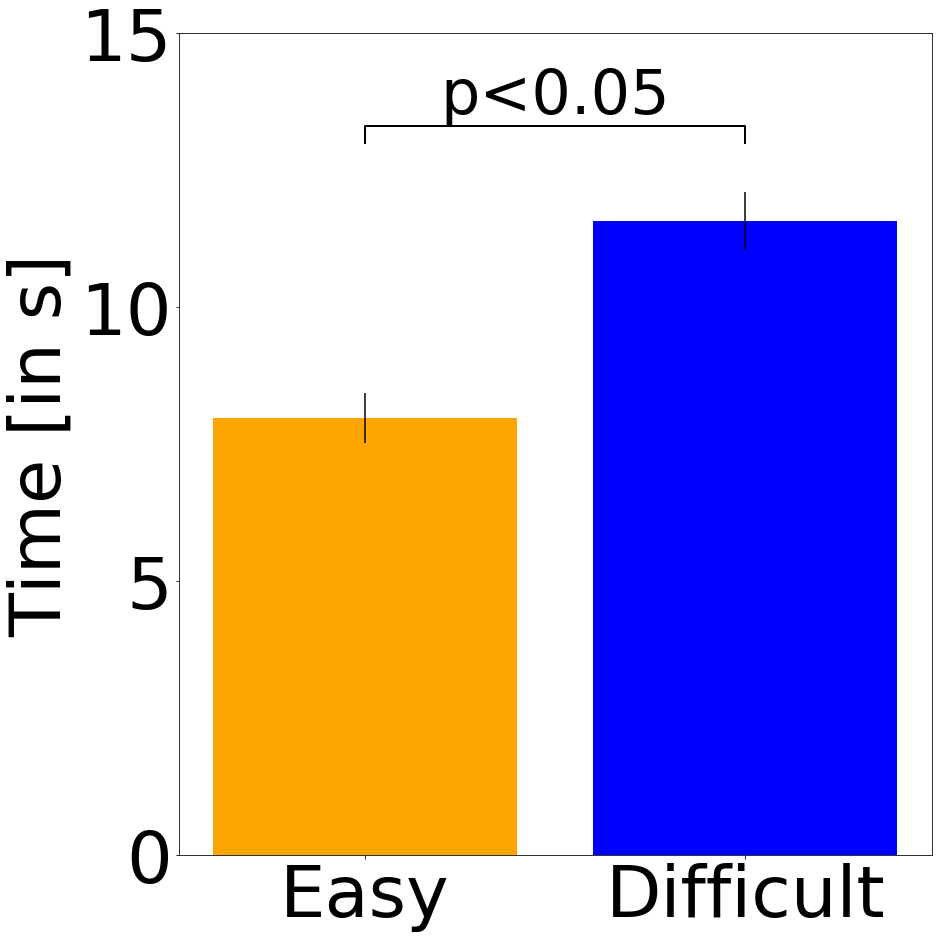

In [12]:
PlotTitle = 'InterBlinkDuration_writing'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['InterBlinkDuration_writing']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    

ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 15])
ax1.set_ylabel('Time [in s]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

# annotate with significance level
maxTime = 13
y_time, h, col = maxTime, 0.3, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.01, "p<0.05", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\InterBlinkDuration_writing.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))


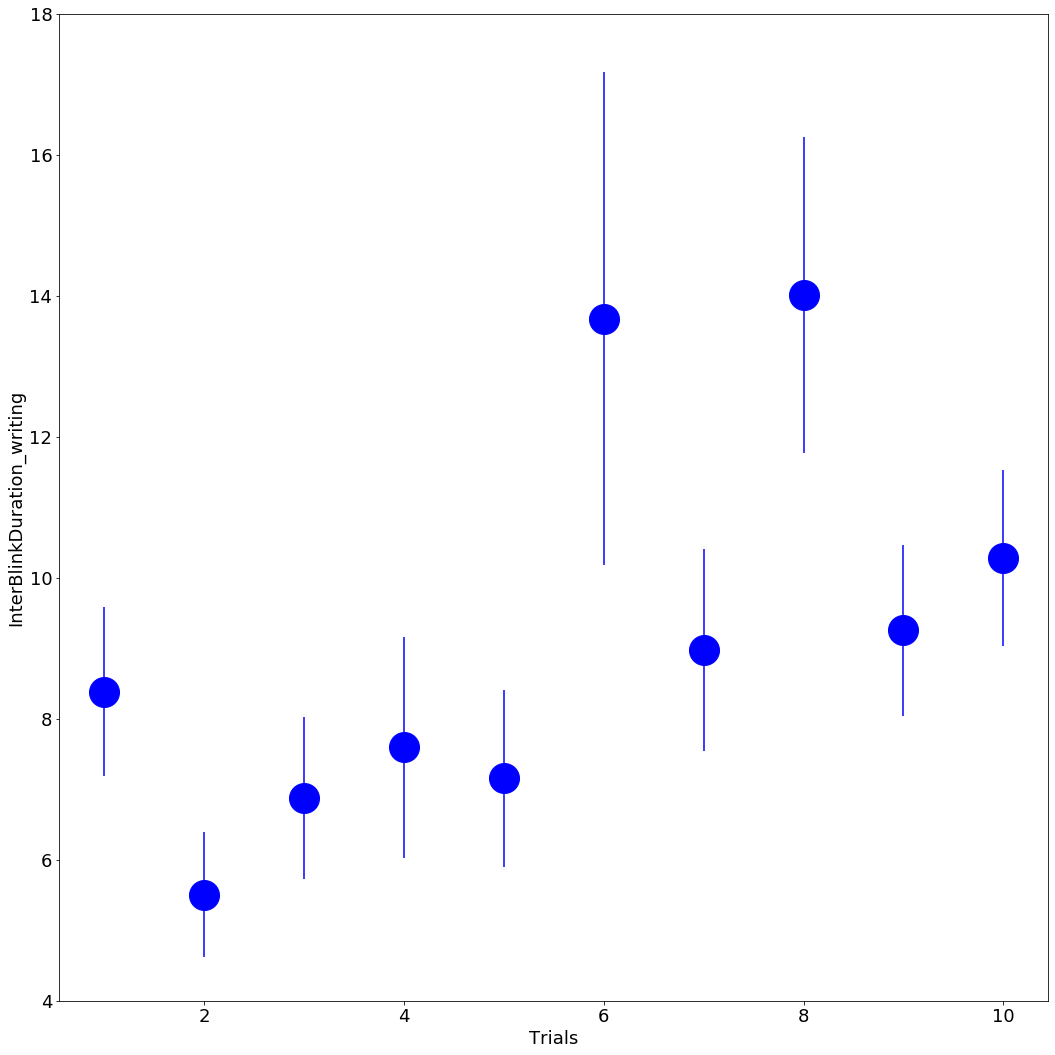

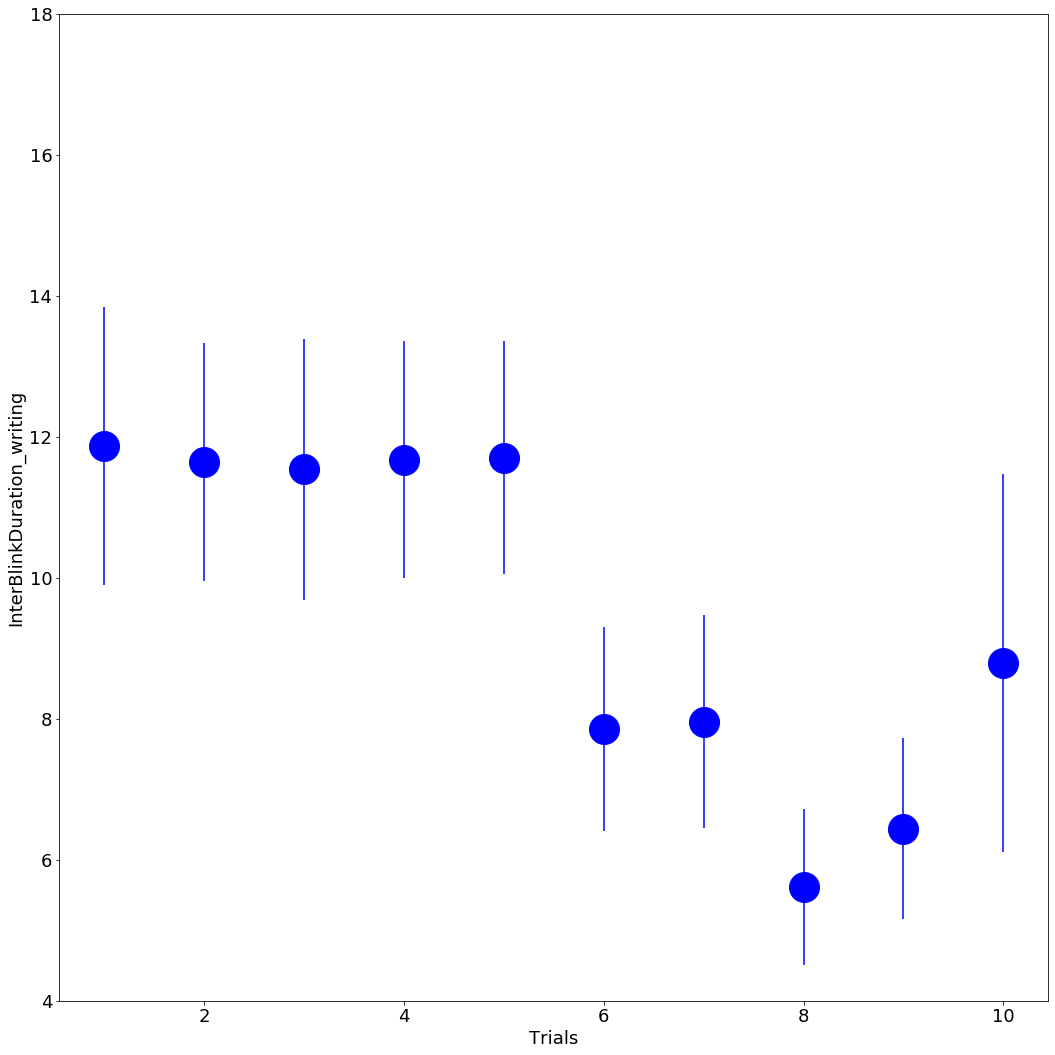

In [14]:


variable = 'InterBlinkDuration_writing'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('InterBlinkDuration_writing')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([4, 18])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\InterBlinkDuration_writing_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    


